Problem Statement:
Sales data of 1559 items across 10 stores in different locations have been collected in the year 2013. Each product has certain attributes that sets it apart from other products. Same is the case with each store.

The goal is to build a predictive model to find out the sales of each product at a particular store.

Dataset: [Big Mart Sales data](https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data?)

### <u>Metadata</u>

**Item_Identifier**:
> Unique product ID  

**Item_Weight**:
> Weight of product  

**Item_Fat_Content**:
>Whether the product is low fat or not  

**Item_Visibility**:
>The % of total display area of all products in a store allocated to the particular product  

**Item_Type**:
>The category to which the product belongs  

**Item_MRP**:
> Maximum Retail Price (list price) of the product  

**Outlet_Identifier**:
> Unique store ID  

**Outlet_Establishment_Year**:
>The year in which store was established 

**Outlet_Size**:
>The size of the store in terms of ground area covered  

**Outlet_Location_Type**:
>The type of city in which the store is located  

**Outlet_Type**:
>Whether the outlet is just a grocery store or some sort of supermarket  

**Item_Outlet_Sales**:
>Sales of the product in the particular store. This is the outcome variable to be predicted  

In [1]:
!head -n 3 ./train.csv

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [2]:
!head -n 3 ./test.csv

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
FDW58,20.75,Low Fat,0.007564836,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
FDW14,8.3,reg,0.038427677,Dairy,87.3198,OUT017,2007,,Tier 2,Supermarket Type1


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head(9)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986


In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
print(train.shape, test.shape)

(8523, 12) (5681, 11)


In [10]:
df = pd.concat([train,test], ignore_index=True)

In [11]:
df.shape

(14204, 12)

In [12]:
8523+5681

14204

In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

2439 missing values for Item_Weight  
4016 missing values for Outlet_Size  
The 5681 missing Item_Outlet_Sales values is the target variable to be predicted in test.csv   

In [14]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

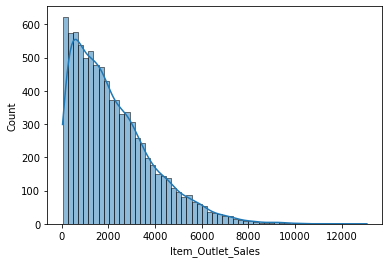

In [15]:
sns.histplot(train, x='Item_Outlet_Sales', kde=True)

Target variable is right skewed.

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

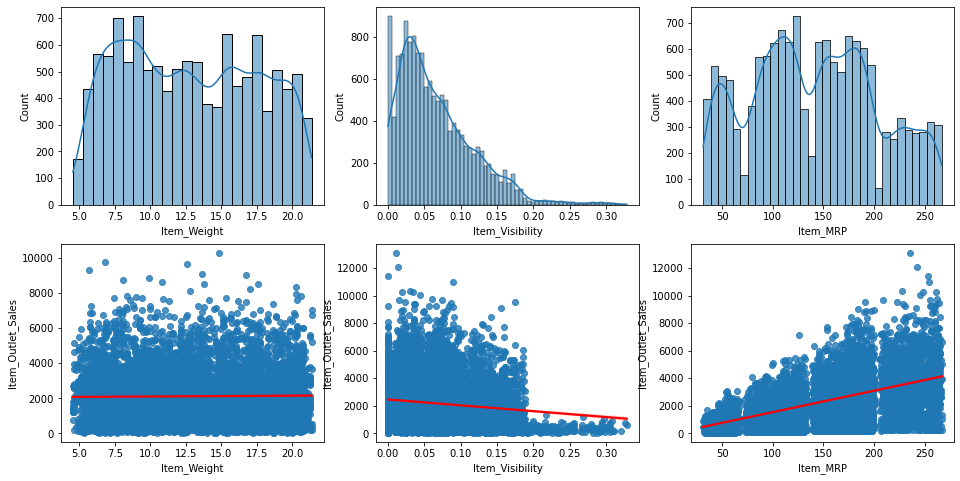

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))

sns.histplot(df, x='Item_Weight', kde=True, ax=ax[0,0])
sns.histplot(df, x='Item_Visibility', kde=True, ax=ax[0,1])
sns.histplot(df, x='Item_MRP', kde=True, ax=ax[0,2])
sns.regplot(data=df, x='Item_Weight', y='Item_Outlet_Sales', line_kws={'color': 'red'}, ax=ax[1,0])
sns.regplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales', line_kws={'color': 'red'}, ax=ax[1,1])
sns.regplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', line_kws={'color': 'red'}, ax=ax[1,2])

Item_Weight has some missing values. Based on the distribution, we can just go with a simple mean imputation.  
Item_Visibility has an large number of 0s. Also, 0% Item Visibility doesn't quite make sense. A segment of items with <2000 sales have more visibility (0.2 - 0.34) than the majority of items.  
Item_MRP (Max Retail Price) has a positive linear relationship with Item_Outlet_Sales. There also seems to be 4 distinguished Item_MRP ranges.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

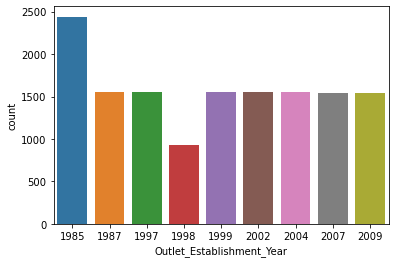

In [17]:
sns.countplot(data=df, x='Outlet_Establishment_Year')

In [18]:
categories = df.columns[~df.columns.isin(df.describe().columns)]

In [19]:
df[categories]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
14199,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1
14200,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2
14201,NCO17,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1
14202,FDJ26,Regular,Canned,OUT017,NaN,Tier 2,Supermarket Type1


In [20]:
len(df['Item_Identifier'].unique())

1559

14204 rows in the dataset, but only 1559 unique Item_Identifiers. Which means the outlets carry the same few 1559 items.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

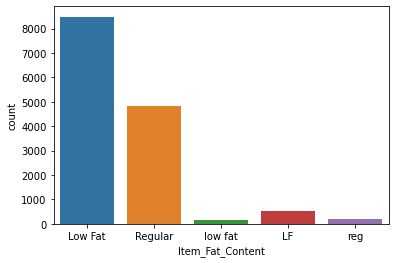

In [21]:
sns.countplot(data=df, x="Item_Fat_Content")

Standardize the categorizations to 'Low Fat' and 'Regular'

In [22]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

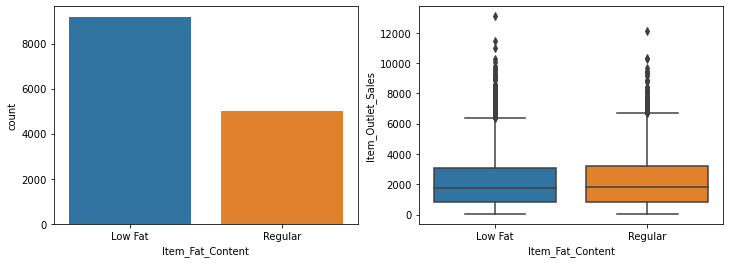

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=df, x="Item_Fat_Content", ax=ax[0])
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales', ax=ax[1])

Does every item sold actually have a Fat Content?

In [24]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

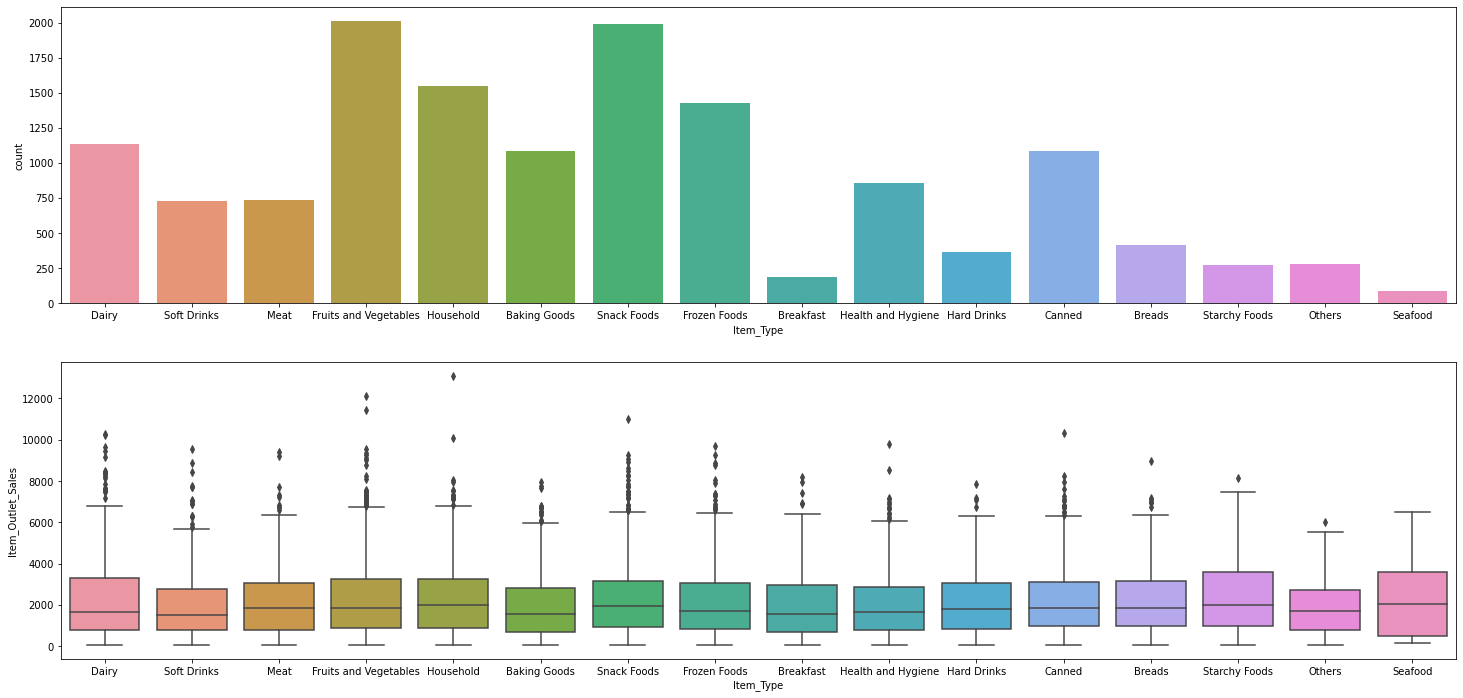

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(25, 12))
sns.countplot(data=df, x="Item_Type", ax=ax[0])
sns.boxplot(data=df, x='Item_Type', y='Item_Outlet_Sales', ax=ax[1])

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

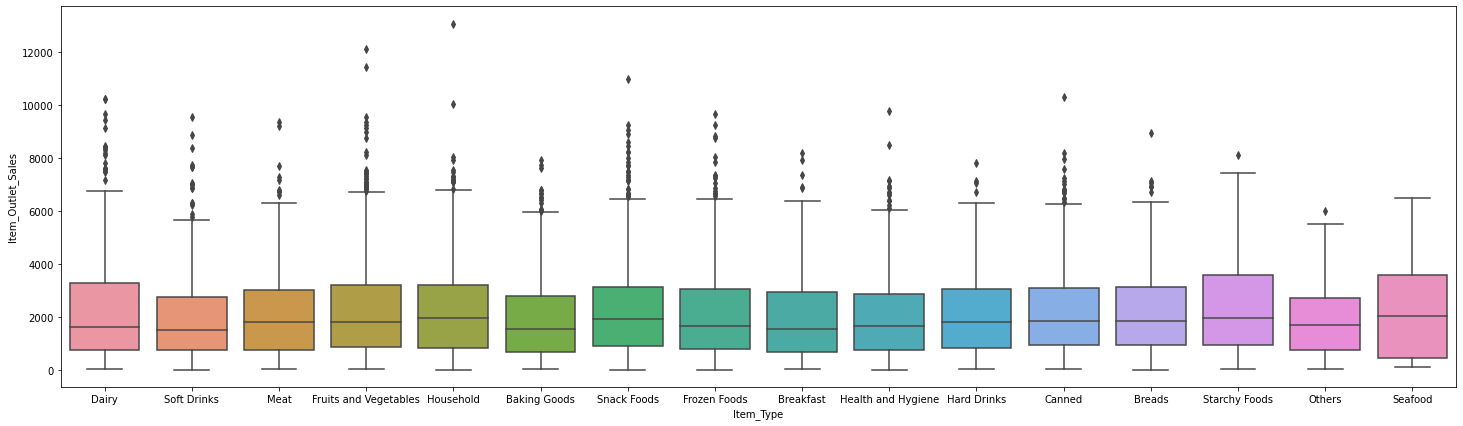

In [26]:
plt.figure(figsize=(25, 7))
sns.boxplot(data=df, x='Item_Type', y='Item_Outlet_Sales')

In [27]:
for i, x in enumerate(df['Item_Type'].unique()):
    print(f'Category {i+1}: {x}')

Category 1: Dairy
Category 2: Soft Drinks
Category 3: Meat
Category 4: Fruits and Vegetables
Category 5: Household
Category 6: Baking Goods
Category 7: Snack Foods
Category 8: Frozen Foods
Category 9: Breakfast
Category 10: Health and Hygiene
Category 11: Hard Drinks
Category 12: Canned
Category 13: Breads
Category 14: Starchy Foods
Category 15: Others
Category 16: Seafood


Some categories have very low count.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

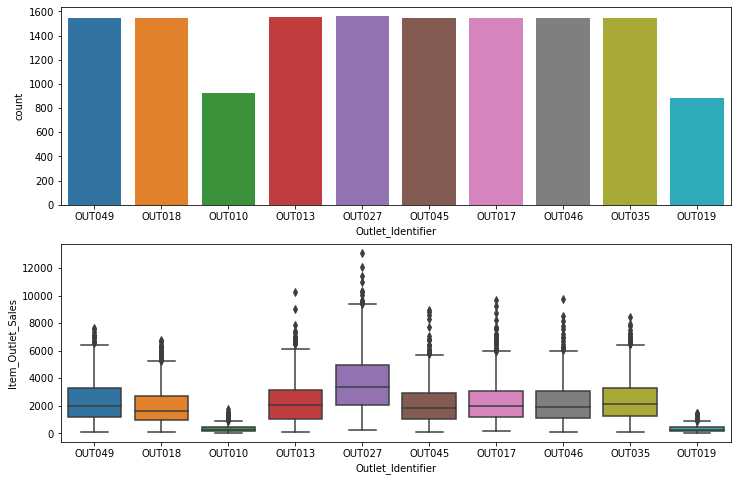

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
sns.countplot(data=df, x="Outlet_Identifier", ax=ax[0])
sns.boxplot(data=df, x='Outlet_Identifier', y='Item_Outlet_Sales', ax=ax[1])

In [29]:
df.groupby('Outlet_Identifier')['Item_Identifier'].count()

Outlet_Identifier
OUT010     925
OUT013    1553
OUT017    1543
OUT018    1546
OUT019     880
OUT027    1559
OUT035    1550
OUT045    1548
OUT046    1550
OUT049    1550
Name: Item_Identifier, dtype: int64

Interestingly, all stores except OUT010 and OUT019 have close to the unique number of Item_Identifiers of 1559 despite having varying Outlet_Sizes, Outlet_Location_Types and Outlet_Types.  
OUT010 and OUT019 have fewer Items in their stores. The sales distribution also has a smaller range as compared to the other outlets.  
Although the rest of the outlets have approximately the same items, OUT027 seems to be outperforming them.  
The remaining outlets are somewhat even in sales distribution.  

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

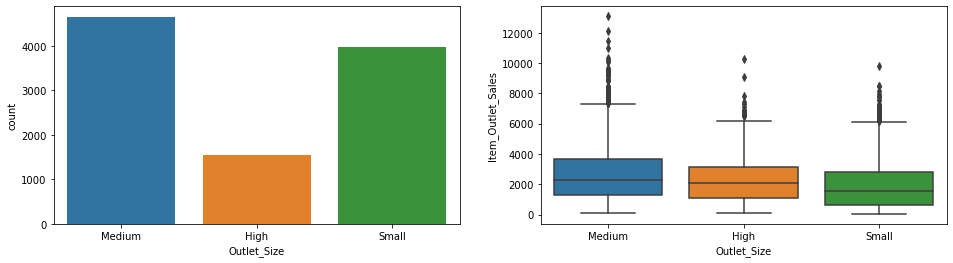

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x="Outlet_Size", ax=ax[0])
sns.boxplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales', ax=ax[1])

Fewer 'High' Outlet_Sized outlets.  
There are Missing Outlet_Size values. Going with mode imputation, we will have more 'Medium' Outlet_Size values.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

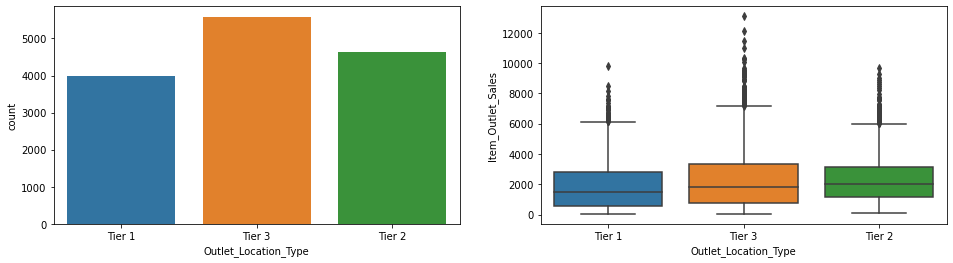

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x="Outlet_Location_Type", ax=ax[0])
sns.boxplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales', ax=ax[1])

Tier 3 outlets have more items with higer sales on the more extreme end. 

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

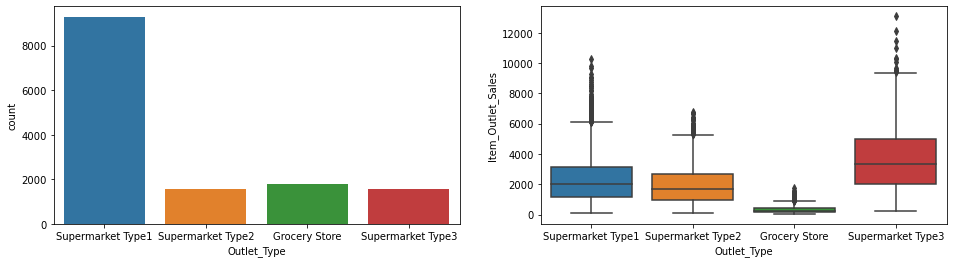

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x="Outlet_Type", ax=ax[0])
sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', ax=ax[1])

Overwhelming number of Supermarket Type1 stores compared to the other Outlet_Types.  
Grocery Stores have lower sales and Supermarket Type3s have better sales

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

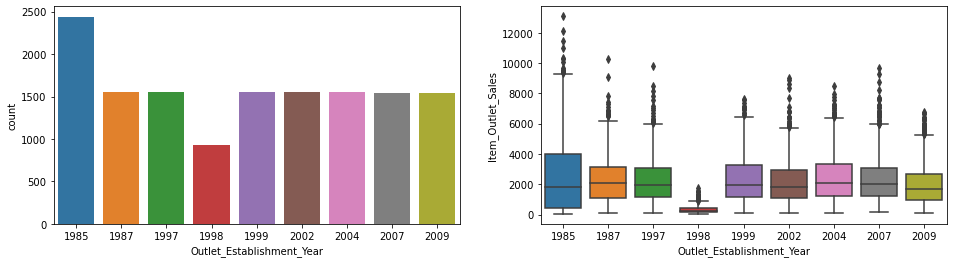

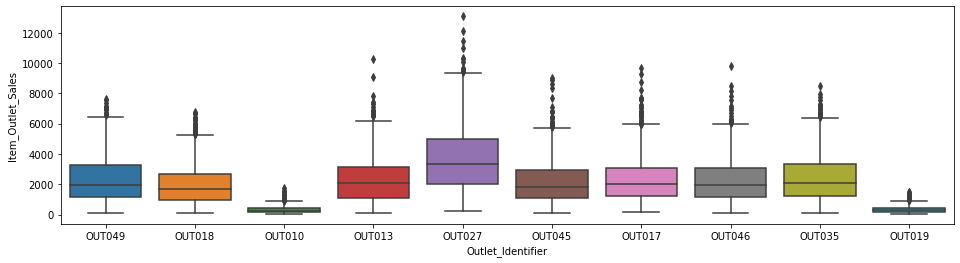

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x="Outlet_Establishment_Year", ax=ax[0])
sns.boxplot(data=df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales', ax=ax[1])
plt.figure(figsize=(16,4))
sns.boxplot(data=df, x='Outlet_Identifier', y='Item_Outlet_Sales')

The boxplot's distribution for 1998 looks similar to that of the Outlet_Type 'Grocery Store'.  
This is also the case for the sales distribution for Outlet_Identifier 'OUT010' and 'OUT019'.  

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

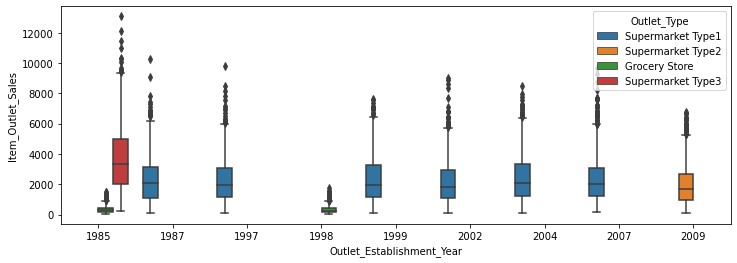

In [34]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales', hue='Outlet_Type')

The genesis of Big Mart came with the opening of Supermarket Type3 and the Grocery Store.  
2 years later, they opened the first Supermarket Type1.  
Supermarket Type2 is their most recent opened outlet.  

### Missing Value Imputation

In [35]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

#### Item_Weight

In [36]:
df[df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
14178,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14179,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14184,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14188,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


As the dataset has 1559 unique Item_Identifiers for sale and the outlets carry around 1500+ items based on the visualisation, it is reasonable to assume they are the same few products which should have the same weight.  
Check if the same Item_Identifier across other stores have Item_Weight labeled.

In [37]:
df[df['Item_Identifier'] == 'FDC37']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
4652,FDC37,15.5,Low Fat,0.032846,Baking Goods,106.7938,OUT013,1987,High,Tier 3,Supermarket Type1,3215.8140
6212,FDC37,15.5,Low Fat,0.032924,Baking Goods,107.2938,OUT049,1999,Medium,Tier 1,Supermarket Type1,2143.8760
8594,FDC37,NaN,Low Fat,0.032714,Baking Goods,108.1938,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
10482,FDC37,15.5,Low Fat,0.055023,Baking Goods,108.2938,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
10747,FDC37,15.5,Low Fat,0.032873,Baking Goods,106.2938,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
11046,FDC37,15.5,Low Fat,0.033007,Baking Goods,106.0938,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
11254,FDC37,15.5,Low Fat,0.032867,Baking Goods,108.0938,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN
11712,FDC37,15.5,Low Fat,0.033059,Baking Goods,105.7938,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
13891,FDC37,15.5,Low Fat,0.032940,Baking Goods,107.0938,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


Item Weight per Item_Identifier is the same across all outlets.  
Create pivot table to get mean weight per Item_Identifier.

In [38]:
mean_weight = df.pivot_table(index='Item_Identifier', values='Item_Weight')

In [39]:
mean_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [40]:
df = df.set_index('Item_Identifier')
df['Item_Weight'].fillna(mean_weight['Item_Weight'], inplace=True)

In [41]:
df = df.reset_index()

In [42]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

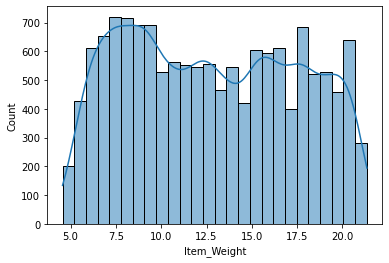

In [43]:
sns.histplot(data=df, x='Item_Weight', kde=True)

#### Outlet_Size

In [44]:
df[df['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
14191,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
14193,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


Initially, I thought Outlet_Size might be associated with the Outlet_Location_Type and/or Outlet_Type in that:
- Larger outlet sizes open up the possibility for more traffic and are likely to have a wider variety of items which can have an effect on sales.  
- Customers from Tier 1 Cities may have more spending power than Tier 2 and Tier 3 and so placing a large outlet in Tier 1 Cities may be a strategic decision to capitalize on the higher customer spendings to improve sales.  

After seeing all Outlets apart from Grocery Stores have close to the total unique Item_Identifiers in their outlets and looking at their sales distributions, a clear pattern may not be easily discernible.

In [45]:
df2 = df[df['Outlet_Size'].isnull()]  #Missing Outlet_Size data
df3 = df[~df['Outlet_Size'].isnull()] #Not missing Outlet_Size data

In [46]:
df3[['Outlet_Size', 'Outlet_Type','Outlet_Location_Type', 'Outlet_Identifier']].value_counts()

Outlet_Size  Outlet_Type        Outlet_Location_Type  Outlet_Identifier
Medium       Supermarket Type3  Tier 3                OUT027               1559
High         Supermarket Type1  Tier 3                OUT013               1553
Medium       Supermarket Type1  Tier 1                OUT049               1550
Small        Supermarket Type1  Tier 1                OUT046               1550
                                Tier 2                OUT035               1550
Medium       Supermarket Type2  Tier 3                OUT018               1546
Small        Grocery Store      Tier 1                OUT019                880
dtype: int64

Get details of the outlets with missing Outlet_Size

In [47]:
df2[['Outlet_Type','Outlet_Location_Type', 'Outlet_Identifier']].value_counts()

Outlet_Type        Outlet_Location_Type  Outlet_Identifier
Supermarket Type1  Tier 2                OUT045               1548
                                         OUT017               1543
Grocery Store      Tier 3                OUT010                925
dtype: int64

Check relationship with total Item_Outlet_Sales.

In [48]:
df3.groupby(['Outlet_Location_Type', 'Outlet_Type', 'Outlet_Identifier' ])['Item_Outlet_Sales'].sum()/10

Outlet_Location_Type  Outlet_Type        Outlet_Identifier
Tier 1                Grocery Store      OUT019                17969.40936
                      Supermarket Type1  OUT046               211839.51682
                                         OUT049               218396.98102
Tier 2                Supermarket Type1  OUT035               226812.29354
Tier 3                Supermarket Type1  OUT013               214266.35782
                      Supermarket Type2  OUT018               185182.28300
                      Supermarket Type3  OUT027               345392.60514
Name: Item_Outlet_Sales, dtype: float64

In [49]:
df2.groupby(['Outlet_Location_Type', 'Outlet_Type', 'Outlet_Identifier' ])['Item_Outlet_Sales'].sum()/10

Outlet_Location_Type  Outlet_Type        Outlet_Identifier
Tier 2                Supermarket Type1  OUT017               216746.52940
                                         OUT045               203672.54770
Tier 3                Grocery Store      OUT010                18834.01724
Name: Item_Outlet_Sales, dtype: float64

Looking at the sales numbers, knowing there are only 10 outlets, and the feature combinations, we know that:  
-OUT027, the (Medium, Tier 3, Supermarket Type3) will pull up the distribution for its respective features due to it's high sales.  
-OUT019, the (Small, Tier 1, Grocery Store) will pull down the distribution for its respective features due to it's low sales.

Create catplots with Outlet_Size, Outlet_Location_Type and Outlet_Type against Item_Outlet_Sales to see where our 3 outlets with missing Outlet_Size can potentially fit in.

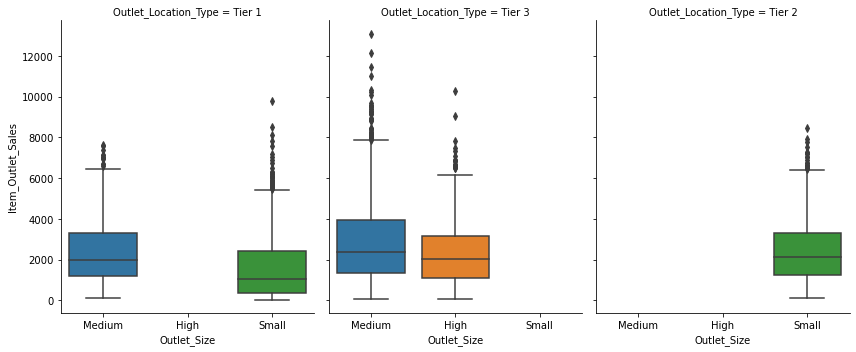

In [50]:
sns.catplot(data=df3, x="Outlet_Size", y="Item_Outlet_Sales", kind="box", col="Outlet_Location_Type", aspect=.8)#,row='Outlet_Type'

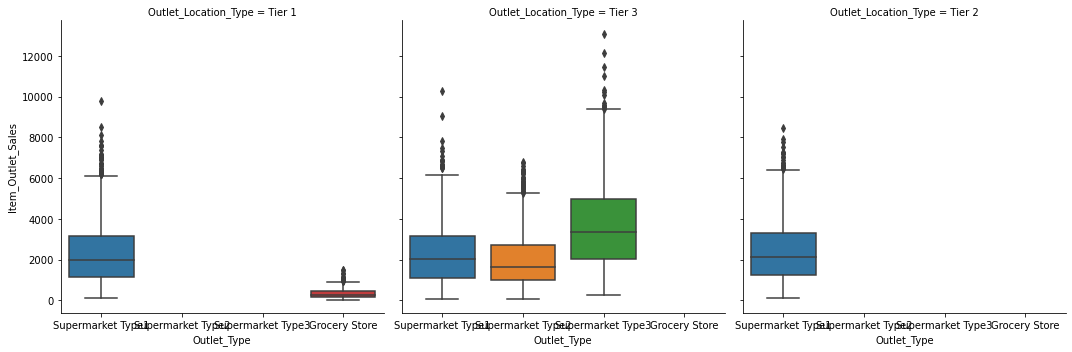

In [51]:
sns.catplot(data=df3, x="Outlet_Type", y="Item_Outlet_Sales", kind="box", col="Outlet_Location_Type")

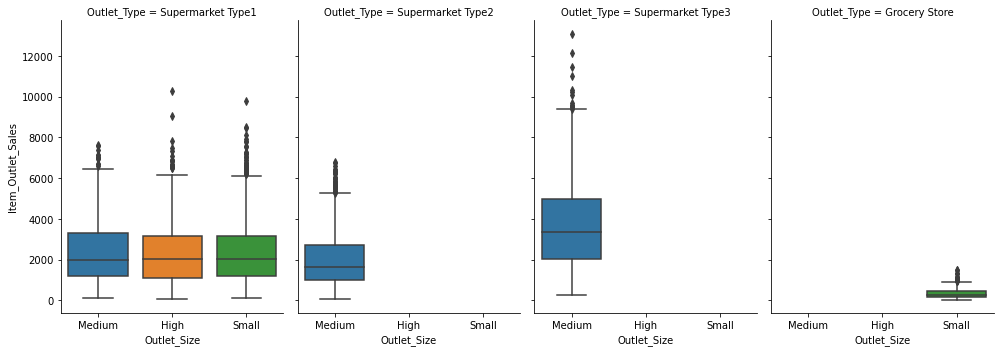

In [52]:
sns.catplot(data=df3, x="Outlet_Size", y="Item_Outlet_Sales", kind="box", col="Outlet_Type", aspect=.7)

Text(0.5, 1.0, 'Average sales per Item_Identifier by Outlet_Identifier/Type for Missing Outlet_Size Outlets')

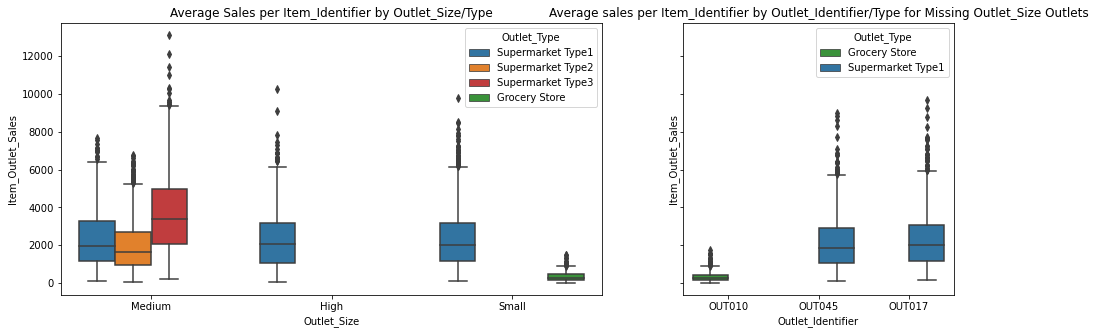

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5), gridspec_kw={'width_ratios': [2, 1]}, sharey=True)

palette = sns.color_palette('tab10')
outlet_types = df['Outlet_Type'].unique().tolist()
palette_dict = {outlet_type: color for outlet_type, color in zip(outlet_types, palette)}

sns.boxplot(data=df3, x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Type', palette=palette_dict, ax=ax[0])
ax[0].set_title('Average Sales per Item_Identifier by Outlet_Size/Type')

sns.boxplot(data=df2, x='Outlet_Identifier', y='Item_Outlet_Sales', hue='Outlet_Type', palette=palette_dict, ax=ax[1])
ax[1].set_title('Average sales per Item_Identifier by Outlet_Identifier/Type for Missing Outlet_Size Outlets')

Distribution of Supermarket Type1s are similar in distribution regardless of Outlet_Size.   
Distribution of Small Grocery Store is the same as OUT010.  
Check mode of Outlet_Size for Supermarket Type1 for imputation.  

In [54]:
df.groupby(['Outlet_Type'])['Outlet_Size'].agg(pd.Series.mode)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [55]:
df.loc[df['Outlet_Size'].isnull(), 'Outlet_Size'] = 'Small'

In [56]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

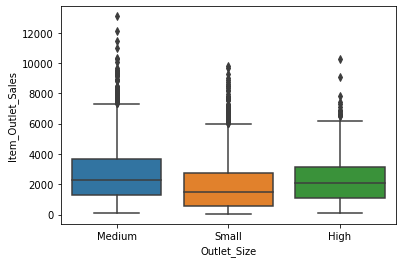

In [57]:
sns.boxplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales')

#### Item_Visibility

__Item Visibility:__ The % of total display area of all products in a store allocated to the particular product.  

minimum data point of Item_Visibility is 0. Explore this area.

In [58]:
df.groupby(['Outlet_Identifier'])['Item_Visibility'].sum()

Outlet_Identifier
OUT010    94.293418
OUT013    93.555174
OUT017    94.342210
OUT018    92.723425
OUT019    94.502641
OUT027    94.075671
OUT035    94.280279
OUT045    94.284513
OUT046    93.285857
OUT049    91.450099
Name: Item_Visibility, dtype: float64

Not all 100% of the display area is used per store.

In [59]:
df[(df['Item_Visibility'] == 0)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
14166,FDQ19,7.350,Regular,0.0,Fruits and Vegetables,244.3512,OUT019,1985,Small,Tier 1,Grocery Store,NaN
14171,FDK26,5.460,Regular,0.0,Canned,187.5240,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14177,FDQ57,7.275,Low Fat,0.0,Snack Foods,144.5760,OUT013,1987,High,Tier 3,Supermarket Type1,NaN
14184,DRG37,16.200,Low Fat,0.0,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [60]:
df[df['Item_Identifier'] == 'FDP33']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
32,FDP33,18.7,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
729,FDP33,18.7,Low Fat,0.089272,Snack Foods,254.7672,OUT046,1997,Small,Tier 1,Supermarket Type1,5113.3440
4349,FDP33,18.7,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
5620,FDP33,18.7,Low Fat,0.089777,Snack Foods,256.4672,OUT017,2007,Small,Tier 2,Supermarket Type1,5369.0112
7221,FDP33,18.7,Low Fat,0.156304,Snack Foods,256.3672,OUT019,1985,Small,Tier 1,Grocery Store,255.6672
7677,FDP33,18.7,Low Fat,0.089198,Snack Foods,257.3672,OUT013,1987,High,Tier 3,Supermarket Type1,2045.3376
10797,FDP33,18.7,Low Fat,0.149423,Snack Foods,255.0672,OUT010,1998,Small,Tier 3,Grocery Store,NaN
13124,FDP33,18.7,Low Fat,0.089453,Snack Foods,254.3672,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
13318,FDP33,18.7,Low Fat,0.089255,Snack Foods,253.9672,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN
13558,FDP33,18.7,Low Fat,0.089411,Snack Foods,254.8672,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN


Item_Visibility per Item across the different stores have similar Item_Visibility numbers.  
*OUT010 and OUT019 have slightly higher numbers than the other stores.

In [61]:
df[((df['Outlet_Identifier'] == 'OUT010') | (df['Outlet_Identifier'] == 'OUT019')) & (df['Item_Visibility'] != 0)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Small,Tier 3,Grocery Store,178.4344
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Small,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,Small,Tier 3,Grocery Store,358.2004
...,...,...,...,...,...,...,...,...,...,...,...,...
14106,NCG18,15.300,Low Fat,0.040231,Household,101.2332,OUT019,1985,Small,Tier 1,Grocery Store,NaN
14119,FDJ15,11.350,Regular,0.040835,Dairy,185.0608,OUT019,1985,Small,Tier 1,Grocery Store,NaN
14123,FDA07,7.550,Regular,0.054180,Fruits and Vegetables,123.5072,OUT019,1985,Small,Tier 1,Grocery Store,NaN
14173,FDC10,9.800,Regular,0.121982,Snack Foods,119.7098,OUT010,1998,Small,Tier 3,Grocery Store,NaN


In [62]:
df[df['Item_Identifier'] == 'FDM39']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
45,FDM39,6.42,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,Small,Tier 3,Grocery Store,358.2004
1190,FDM39,6.42,Low Fat,0.053688,Dairy,178.3002,OUT018,2009,Medium,Tier 3,Supermarket Type2,2328.3026
1320,FDM39,6.42,Low Fat,0.053554,Dairy,178.6002,OUT049,1999,Medium,Tier 1,Supermarket Type1,3582.0040
7826,FDM39,6.42,Low Fat,0.053212,Dairy,177.6002,OUT027,1985,Medium,Tier 3,Supermarket Type3,8417.7094
7925,FDM39,6.42,Low Fat,0.053426,Dairy,178.7002,OUT013,1987,High,Tier 3,Supermarket Type1,4477.5050
10131,FDM39,6.42,Low Fat,0.053579,Dairy,177.3002,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
10994,FDM39,6.42,Low Fat,0.053461,Dairy,178.9002,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN
12693,FDM39,6.42,Low Fat,0.053471,Dairy,178.2002,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
13138,FDM39,6.42,Low Fat,0.053773,Dairy,179.0002,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
13635,FDM39,6.42,Low Fat,0.093620,Dairy,180.3002,OUT019,1985,Small,Tier 1,Grocery Store,NaN


OUT010 and OUT019 appears to consistently have different Item_Visibility numbers compared to **ALL** other Outlet_Identifiers.  
The distinguishing factor between the two and the rest of the outlets is the Outlet_Type being 'Grocery_Store'.

Try to impute rows with 0 Item visibility with mean Item Visibility.

In [63]:
item_vis_mean = df.pivot_table(index=['Item_Identifier'], values='Item_Visibility')

In [64]:
item_vis_mean

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [65]:
item_vis_0 = df.loc[df['Item_Visibility'] == 0,:]

In [66]:
item_vis_0

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
14166,FDQ19,7.350,Regular,0.0,Fruits and Vegetables,244.3512,OUT019,1985,Small,Tier 1,Grocery Store,NaN
14171,FDK26,5.460,Regular,0.0,Canned,187.5240,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14177,FDQ57,7.275,Low Fat,0.0,Snack Foods,144.5760,OUT013,1987,High,Tier 3,Supermarket Type1,NaN
14184,DRG37,16.200,Low Fat,0.0,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [67]:
item_vis_0.loc[:,'Item_Visibility'] = np.nan

C:\Users\dnkr9\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [68]:
item_vis_0 = item_vis_0.set_index(['Item_Identifier'])

In [69]:
item_vis_0['Item_Visibility'] = item_vis_0['Item_Visibility'].fillna(item_vis_mean['Item_Visibility'])

In [70]:
item_vis_0 = item_vis_0.reset_index()

In [71]:
df.groupby('Outlet_Identifier')['Item_Visibility'].sum()

Outlet_Identifier
OUT010    94.293418
OUT013    93.555174
OUT017    94.342210
OUT018    92.723425
OUT019    94.502641
OUT027    94.075671
OUT035    94.280279
OUT045    94.284513
OUT046    93.285857
OUT049    91.450099
Name: Item_Visibility, dtype: float64

In [72]:
item_vis_0.groupby('Outlet_Identifier')['Item_Visibility'].sum() + df.groupby('Outlet_Identifier')['Item_Visibility'].sum()

Outlet_Identifier
OUT010    97.262021
OUT013    99.581388
OUT017    99.652015
OUT018    99.364324
OUT019    97.248069
OUT027    99.432339
OUT035    99.565685
OUT045    99.489174
OUT046    99.355668
OUT049    99.204899
Name: Item_Visibility, dtype: float64

-All outlets are close to the full display area utilization after mean imputation. The rows with Item_Visibility 0 might be dirty data afterall.  
-OUT010 and OUT019 having 97% utilization might be the difference due to 'Grocery Store' Outlet_Types usually having a higher visibility % compared to the other Outlet_Types as previously discovered.

Try imputation by Outlet_Type/Item_Identifier to see if we can get a total visibility closer to 100%.

In [73]:
item_vis_not_0 = df.loc[~(df['Item_Visibility'] == 0),:]

In [74]:
grocery_mean = item_vis_not_0.pivot_table(index=['Outlet_Type','Item_Identifier'], values='Item_Visibility')

In [75]:
grocery_mean

Item_Visibility
Outlet_Type       Item_Identifier                 
Grocery Store     DRA12                   0.068535
                  DRA24                   0.068370
                  DRA59                   0.219055
                  DRB01                   0.143991
                  DRB13                   0.011791
...                                            ...
Supermarket Type3 NCZ30                   0.026058
                  NCZ41                   0.064109
                  NCZ42                   0.011233
                  NCZ53                   0.024359
                  NCZ54                   0.082956

[5703 rows x 1 columns]

In [76]:
item_vis_0_2 = item_vis_0.loc[(item_vis_0['Outlet_Identifier'] == 'OUT010') | (item_vis_0['Outlet_Identifier'] == 'OUT019'),:]
item_vis_0_2['Item_Visibility'] = np.nan

C:\Users\dnkr9\AppData\Local\Temp/ipykernel_32184/3938212292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_vis_0_2['Item_Visibility'] = np.nan


In [77]:
item_vis_0_2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDX07,19.200,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
14,FDR47,17.850,Low Fat,NaN,Breads,196.5794,OUT010,1998,Small,Tier 3,Grocery Store,585.2382
16,NCZ54,14.650,Low Fat,NaN,Household,161.5552,OUT010,1998,Small,Tier 3,Grocery Store,324.9104
17,FDR44,6.110,Regular,NaN,Fruits and Vegetables,131.2968,OUT010,1998,Small,Tier 3,Grocery Store,260.9936
26,NCZ42,10.500,Low Fat,NaN,Household,238.3248,OUT010,1998,Small,Tier 3,Grocery Store,711.0744
...,...,...,...,...,...,...,...,...,...,...,...,...
812,FDK57,10.195,Low Fat,NaN,Snack Foods,119.7440,OUT010,1998,Small,Tier 3,Grocery Store,NaN
821,NCV06,11.300,Low Fat,NaN,Household,192.2478,OUT010,1998,Small,Tier 3,Grocery Store,NaN
822,FDY28,7.470,Regular,NaN,Frozen Foods,214.8218,OUT010,1998,Small,Tier 3,Grocery Store,NaN
858,FDT36,12.300,Low Fat,NaN,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,NaN


In [78]:
item_vis_0_2['Item_Visibility'].isnull().sum()

103

In [79]:
item_vis_0_2 = item_vis_0_2.set_index(['Outlet_Type','Item_Identifier'])

In [80]:
item_vis_0_2['Item_Visibility'] = item_vis_0_2['Item_Visibility'].fillna(grocery_mean['Item_Visibility'])

In [81]:
item_vis_0_2['Item_Visibility'].isnull().sum()

40

40 Items that couldn't be imputed due to lack of (Grocery Store,Item_Identifier) combination from the other grocery store that makes up the pivot table used for imputation.

In [82]:
item_vis_0_2 = item_vis_0_2.reset_index()

Impute the remaining 40 Items with the mean Item_Visibility of Item_Identifiers across **all** stores

In [83]:
item_vis_mean

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [84]:
item_vis_0_2 = item_vis_0_2.set_index('Item_Identifier')

In [85]:
item_vis_0_2['Item_Visibility'] = item_vis_0_2['Item_Visibility'].fillna(item_vis_mean['Item_Visibility'])

In [86]:
item_vis_0_2 = item_vis_0_2.reset_index()

In [87]:
item_vis_0_2.Item_Visibility.isnull().sum()

0

In [88]:
item_vis_0_2.groupby('Outlet_Identifier')['Item_Visibility'].sum() + df.groupby('Outlet_Identifier')['Item_Visibility'].sum()

Outlet_Identifier
OUT010    98.999737
OUT013          NaN
OUT017          NaN
OUT018          NaN
OUT019    98.948310
OUT027          NaN
OUT035          NaN
OUT045          NaN
OUT046          NaN
OUT049          NaN
Name: Item_Visibility, dtype: float64

Item_Visibility values are closer to 100% as compared to before.

In [89]:
df.groupby('Outlet_Identifier')['Item_Visibility'].sum()

Outlet_Identifier
OUT010    94.293418
OUT013    93.555174
OUT017    94.342210
OUT018    92.723425
OUT019    94.502641
OUT027    94.075671
OUT035    94.280279
OUT045    94.284513
OUT046    93.285857
OUT049    91.450099
Name: Item_Visibility, dtype: float64

In [90]:
df = df.set_index(['Outlet_Identifier','Item_Identifier'])

In [91]:
item_vis_0 = item_vis_0.set_index(['Outlet_Identifier','Item_Identifier'])

In [92]:
df['Item_Visibility'].update(item_vis_0['Item_Visibility'])

In [93]:
df = df.reset_index()

In [94]:
df.groupby('Outlet_Identifier')['Item_Visibility'].sum()

Outlet_Identifier
OUT010    97.262021
OUT013    99.581388
OUT017    99.652015
OUT018    99.364324
OUT019    97.248069
OUT027    99.432339
OUT035    99.565685
OUT045    99.489174
OUT046    99.355668
OUT049    99.204899
Name: Item_Visibility, dtype: float64

In [95]:
df = df.set_index(['Outlet_Identifier','Item_Identifier'])

In [96]:
item_vis_0_2 = item_vis_0_2.set_index(['Outlet_Identifier','Item_Identifier'])

In [97]:
df['Item_Visibility'].update(item_vis_0_2['Item_Visibility'])

In [98]:
df = df.reset_index()

In [99]:
df.groupby('Outlet_Identifier')['Item_Visibility'].sum()

Outlet_Identifier
OUT010    98.999737
OUT013    99.581388
OUT017    99.652015
OUT018    99.364324
OUT019    98.948310
OUT027    99.432339
OUT035    99.565685
OUT045    99.489174
OUT046    99.355668
OUT049    99.204899
Name: Item_Visibility, dtype: float64

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

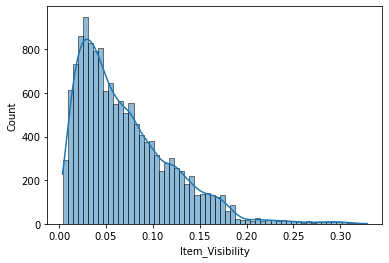

In [100]:
sns.histplot(data=df, x='Item_Visibility', kde=True)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

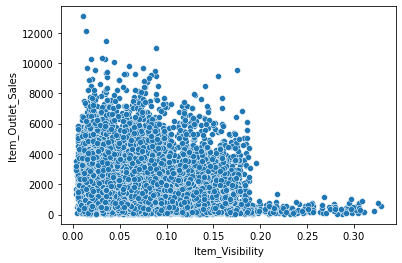

In [101]:
sns.scatterplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

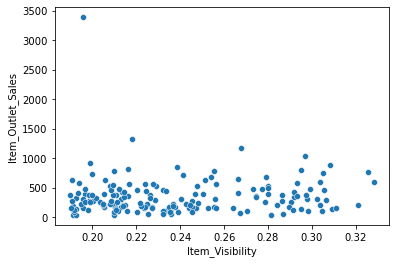

In [102]:
sns.scatterplot(data=df[df['Item_Visibility'] > 0.189], x='Item_Visibility', y='Item_Outlet_Sales')

In [103]:
df[df['Item_Visibility'] > 0.189]

,Outlet_Identifier,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,OUT019,FDS02,10.195,Regular,0.255395,Dairy,196.8794,1985,Small,Tier 1,Grocery Store,780.3176
65,OUT010,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,1998,Small,Tier 3,Grocery Store,184.4266
83,OUT019,NCL18,18.850,Low Fat,0.293418,Household,194.6136,1985,Small,Tier 1,Grocery Store,583.2408
108,OUT019,DRE60,9.395,Low Fat,0.278974,Soft Drinks,225.3720,1985,Small,Tier 1,Grocery Store,679.1160
174,OUT010,FDI32,17.700,Low Fat,0.291865,Fruits and Vegetables,115.1834,1998,Small,Tier 3,Grocery Store,345.5502
...,...,...,...,...,...,...,...,...,...,...,...,...
13992,OUT010,FDO27,6.175,Regular,0.299739,Meat,96.1752,1998,Small,Tier 3,Grocery Store,NaN
14005,OUT019,FDO39,6.985,Regular,0.240512,Meat,181.9608,1985,Small,Tier 1,Grocery Store,NaN
14037,OUT010,DRJ25,14.600,Low Fat,0.252019,Soft Drinks,50.3692,1998,Small,Tier 3,Grocery Store,NaN
14094,OUT010,FDI15,13.800,Low Fat,0.236595,Dairy,265.0884,1998,Small,Tier 3,Grocery Store,NaN


The items with Item_Visibility > 0.2 are from Outlet_Type 'Grocery Store' as they have fewer items (900+) compared to the supermarkets (1500+)

**Item_Fat_Content**

Check if all items should have a Item_Fat_Content

In [104]:
for i, x in enumerate(df['Item_Type'].unique()):
    print(f'Category {i+1}: {x}')

Category 1: Dairy
Category 2: Soft Drinks
Category 3: Meat
Category 4: Fruits and Vegetables
Category 5: Household
Category 6: Baking Goods
Category 7: Snack Foods
Category 8: Frozen Foods
Category 9: Breakfast
Category 10: Health and Hygiene
Category 11: Hard Drinks
Category 12: Canned
Category 13: Breads
Category 14: Starchy Foods
Category 15: Others
Category 16: Seafood


In [105]:
df[df['Item_Type'] == 'Health and Hygiene']

,Outlet_Identifier,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
16,OUT018,NCB42,11.80,Low Fat,0.008596,Health and Hygiene,115.3492,2009,Medium,Tier 3,Supermarket Type2,1621.8888
31,OUT018,NCS17,18.60,Low Fat,0.080829,Health and Hygiene,96.4436,2009,Medium,Tier 3,Supermarket Type2,2741.7644
35,OUT049,NCX29,10.00,Low Fat,0.089291,Health and Hygiene,146.7102,1999,Medium,Tier 1,Supermarket Type1,3791.0652
46,OUT045,NCP05,19.60,Low Fat,0.018757,Health and Hygiene,153.3024,2002,Small,Tier 2,Supermarket Type1,2428.8384
50,OUT046,NCL17,7.39,Low Fat,0.067780,Health and Hygiene,143.8812,1997,Small,Tier 1,Supermarket Type1,3134.5864
...,...,...,...,...,...,...,...,...,...,...,...,...
14134,OUT018,NCS41,12.85,Low Fat,0.050387,Health and Hygiene,182.6608,2009,Medium,Tier 3,Supermarket Type2,NaN
14144,OUT049,NCJ17,7.68,Low Fat,0.152794,Health and Hygiene,86.2224,1999,Medium,Tier 1,Supermarket Type1,NaN
14158,OUT046,NCS41,12.85,Low Fat,0.050387,Health and Hygiene,184.2608,1997,Small,Tier 1,Supermarket Type1,NaN
14165,OUT049,NCL17,7.39,Low Fat,0.067885,Health and Hygiene,143.0812,1999,Medium,Tier 1,Supermarket Type1,NaN


In [106]:
df[df['Item_Type'] == 'Health and Hygiene']['Item_Fat_Content'].value_counts()

Low Fat    858
Name: Item_Fat_Content, dtype: int64

Even 'Health and Hygiene' Item_Types are considered Low Fat even though they are unlikely to be edible. 

In [107]:
nc_idx = df[df['Item_Identifier'].str.startswith('NC')].index

In [108]:
df.loc[nc_idx,'Item_Type'].value_counts()

Household             1548
Health and Hygiene     858
Others                 280
Name: Item_Type, dtype: int64

In [109]:
df.loc[nc_idx,'Item_Fat_Content'] = 'No Fat Content'

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

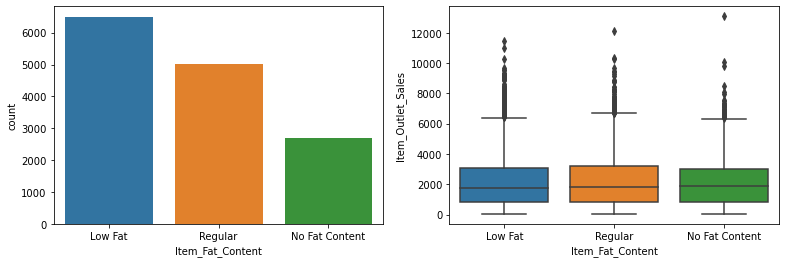

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(13,4))
sns.countplot(data=df, x="Item_Fat_Content", ax=axes[0])
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales', ax=axes[1])

<AxesSubplot:>

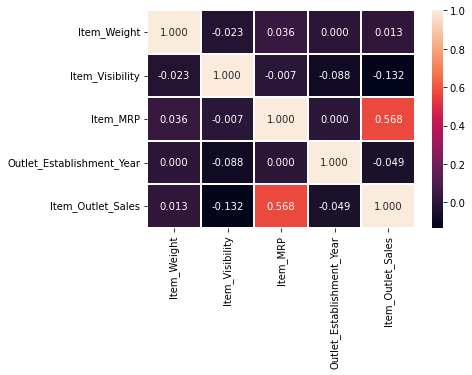

In [111]:
sns.heatmap(df.corr(), annot=True, fmt=".3f", linewidth=.1)

In [112]:
train_clean = df[~df['Item_Outlet_Sales'].isnull()]
test_clean = df[df['Item_Outlet_Sales'].isnull()]

In [113]:
train_clean.to_csv('train_clean.csv', index=False)
test_clean.to_csv('test_clean.csv', index=False)

### Feature Engineering

**EDA notes**  
-Add an outlet age variable based on Outlet_Establishment_Year.  
-Item_Type has many categories and also has similar sales distribution across.  

#### Outlet_Age

In [114]:
#2013 because the data was collected in 2013
df['Outlet_Age'] = 2013-df['Outlet_Establishment_Year']

<AxesSubplot:xlabel='Outlet_Age', ylabel='count'>

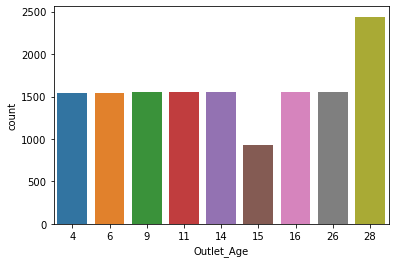

In [115]:
sns.countplot(data=df, x='Outlet_Age')

#### Item_Fat_Content / Item_Type

In [116]:
df.loc[nc_idx, 'Item_Type'].value_counts()

Household             1548
Health and Hygiene     858
Others                 280
Name: Item_Type, dtype: int64

In [117]:
fd_idx = df[df['Item_Identifier'].str.startswith('FD')].index

In [118]:
df.loc[fd_idx,'Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Frozen Foods             1426
Baking Goods             1086
Canned                   1084
Dairy                     907
Meat                      736
Breads                    416
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [119]:
dr_idx = df[df['Item_Identifier'].str.startswith('DR')].index

In [120]:
df.loc[dr_idx,'Item_Type'].value_counts()

Soft Drinks    726
Hard Drinks    362
Dairy          229
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

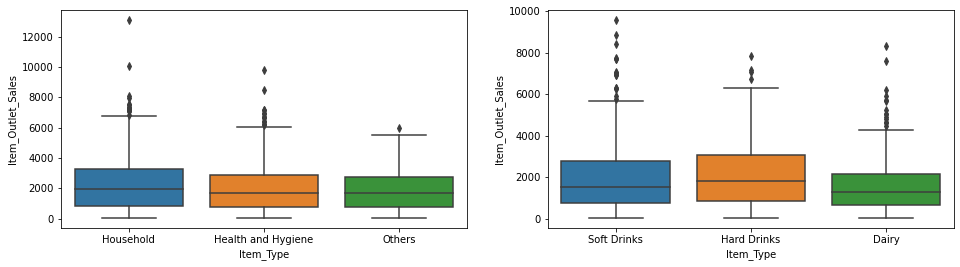

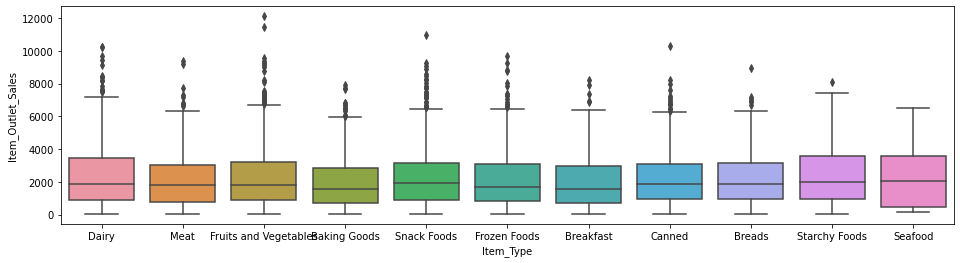

In [121]:
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.boxplot(data=df.loc[nc_idx], x='Item_Type', y='Item_Outlet_Sales', ax=ax[0])
sns.boxplot(data=df.loc[dr_idx], x='Item_Type', y='Item_Outlet_Sales', ax=ax[1])
plt.figure(figsize=(16,4))
sns.boxplot(data=df.loc[fd_idx], x='Item_Type', y='Item_Outlet_Sales')

In [122]:
df['Item_Type_New'] = df['Item_Identifier'].apply(lambda x: str(x)[:2])

In [123]:
df['Item_Type_New'] = df['Item_Type_New'].replace({'FD':'Food',
                                                   'DR':'Drinks',
                                                   'NC':'Non-Consumable'})

In [124]:
df['Item_Type_New'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_New, dtype: int64

<AxesSubplot:xlabel='Item_Type_New', ylabel='Item_Outlet_Sales'>

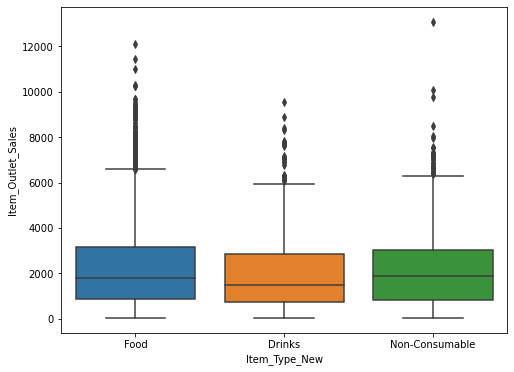

In [125]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Item_Type_New', y='Item_Outlet_Sales')

**Item_MRP**

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

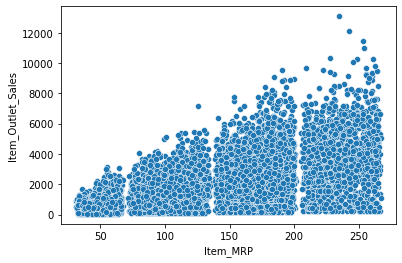

In [126]:
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

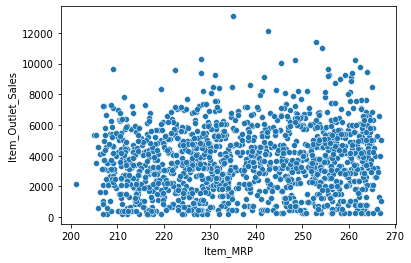

In [127]:
sns.scatterplot(data=df[df['Item_MRP'] > 201], x='Item_MRP', y='Item_Outlet_Sales')

In [128]:
df[df['Item_MRP'] > 207]

,Outlet_Identifier,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_New
0,OUT049,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food
19,OUT035,FDU02,13.350,Low Fat,0.102492,Dairy,230.5352,2004,Small,Tier 2,Supermarket Type1,2748.4224,9,Food
20,OUT013,FDN22,18.850,Regular,0.138190,Snack Foods,250.8724,1987,High,Tier 3,Supermarket Type1,3775.0860,26,Food
32,OUT018,FDP33,18.700,Low Fat,0.093093,Snack Foods,256.6672,2009,Medium,Tier 3,Supermarket Type2,3068.0064,4,Food
40,OUT046,FDU02,13.350,Low Fat,0.102512,Dairy,230.6352,1997,Small,Tier 1,Supermarket Type1,3435.5280,16,Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14183,OUT013,FDK22,9.800,Low Fat,0.026065,Snack Foods,215.3850,1987,High,Tier 3,Supermarket Type1,NaN,26,Food
14185,OUT017,FDK22,9.800,Low Fat,0.026234,Snack Foods,214.3850,2007,Small,Tier 2,Supermarket Type1,NaN,6,Food
14193,OUT017,FDO03,10.395,Regular,0.037092,Meat,229.4352,2007,Small,Tier 2,Supermarket Type1,NaN,6,Food
14195,OUT049,NCH42,6.860,No Fat Content,0.036594,Household,231.1010,1999,Medium,Tier 1,Supermarket Type1,NaN,14,Non-Consumable


12001 rows - 67  
11996 rows - 68,69,70,71  
11993 rows - 72  

7341 rows - 134  
7335 rows - 135,136,137  
7334 rows - 138  
7318 rows - 139  

2415 rows - 200  
2402 rows - 201  
2400 rows - 202,203,204  
2399 rows - 205  
2385 rows - 206  

bin1
Item_MRP < 69

bin2
Item_MRP > 69 & Item_MRP < 136

bin3
Item_MRP > 136 & Item_MRP < 203

bin4
Item_MRP > 203

In [129]:
min_MRP = df['Item_MRP'].min()-1
max_MRP = df['Item_MRP'].max()+1

In [130]:
bins = [min_MRP, 69, 136, 203, max_MRP]
labels = [1, 2, 3, 4]
df['Item_MRP_Category'] = pd.cut(df['Item_MRP'], bins=bins, labels=labels)

In [131]:
df['Item_MRP_Category'] = df['Item_MRP_Category'].astype(int)

In [132]:
df['Item_MRP_Category']

0        4
1        1
2        3
3        3
4        1
        ..
14199    3
14200    3
14201    2
14202    4
14203    2
Name: Item_MRP_Category, Length: 14204, dtype: int32

In [133]:
df['Item_MRP_Category'].value_counts()

3    4935
2    4661
4    2400
1    2208
Name: Item_MRP_Category, dtype: int64

<AxesSubplot:xlabel='Item_MRP_Category', ylabel='Item_Outlet_Sales'>

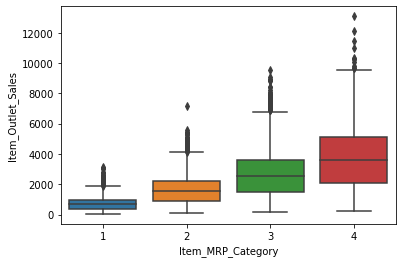

In [134]:
sns.boxplot(data=df, x='Item_MRP_Category', y='Item_Outlet_Sales')

<AxesSubplot:>

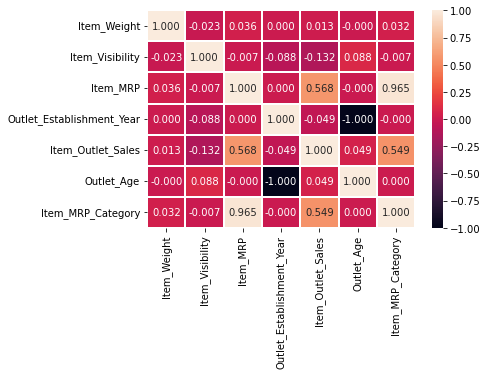

In [135]:
sns.heatmap(df.corr(), annot=True, fmt=".3f", linewidth=.1)

### Pre-processing

In [136]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error as mse
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.pipeline import Pipeline
from scipy.stats import skew
from datetime import datetime as dt

In [137]:
test_clean = df[df['Item_Outlet_Sales'].isnull()]

In [138]:
train_clean = df[~df['Item_Outlet_Sales'].isnull()]

In [139]:
train_clean

,Outlet_Identifier,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_New,Item_MRP_Category
0,OUT049,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food,4
1,OUT018,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks,1
2,OUT049,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food,3
3,OUT010,FDX07,19.200,Regular,0.017834,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800,15,Food,3
4,OUT013,NCD19,8.930,No Fat Content,0.009780,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,OUT013,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834,26,Food,4
8519,OUT045,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Small,Tier 2,Supermarket Type1,549.2850,11,Food,2
8520,OUT035,NCJ29,10.600,No Fat Content,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136,9,Non-Consumable,2
8521,OUT018,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976,4,Food,2


In [140]:
X = train_clean.drop(['Item_Identifier', 'Item_Type', 'Outlet_Establishment_Year'], axis=1)
y = train_clean['Item_Outlet_Sales']

In [141]:
X

,Outlet_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_New,Item_MRP_Category
0,OUT049,9.300,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food,4
1,OUT018,5.920,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks,1
2,OUT049,17.500,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food,3
3,OUT010,19.200,Regular,0.017834,182.0950,Small,Tier 3,Grocery Store,732.3800,15,Food,3
4,OUT013,8.930,No Fat Content,0.009780,53.8614,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,OUT013,6.865,Low Fat,0.056783,214.5218,High,Tier 3,Supermarket Type1,2778.3834,26,Food,4
8519,OUT045,8.380,Regular,0.046982,108.1570,Small,Tier 2,Supermarket Type1,549.2850,11,Food,2
8520,OUT035,10.600,No Fat Content,0.035186,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,9,Non-Consumable,2
8521,OUT018,7.210,Regular,0.145221,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,4,Food,2


In [142]:
X_dummy = pd.get_dummies(X, drop_first=True, columns=['Outlet_Identifier','Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_New'])

<AxesSubplot:>

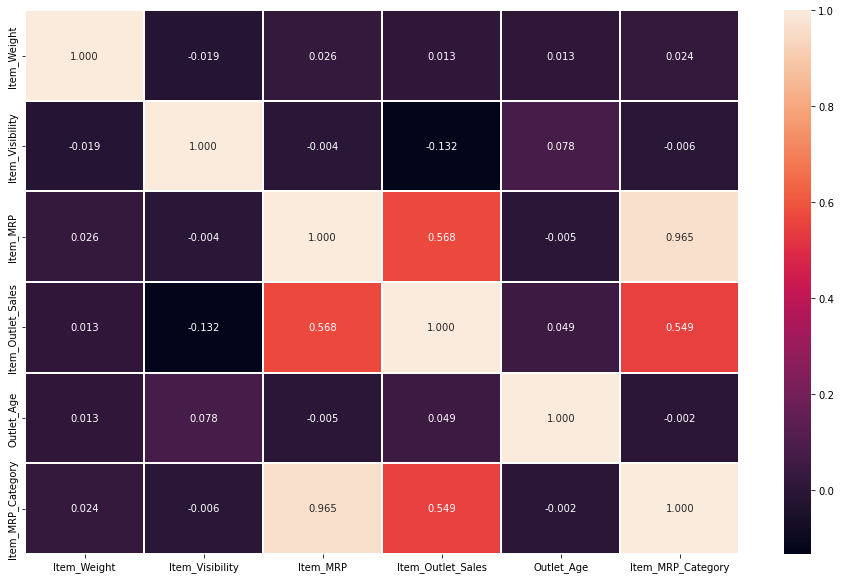

In [143]:
plt.figure(figsize=(16,10))
sns.heatmap(X.corr(), annot=True, fmt=".3f", linewidth=.1)

In [144]:
X_dummy = X_dummy.drop('Item_Outlet_Sales', axis=1)

encoder = LabelEncoder()

X['Outlet_Size'] = encoder.fit_transform(X['Outlet_Size'])
X['Outlet_Location_Type'] = encoder.fit_transform(X['Outlet_Location_Type'])
X['Outlet_Type'] = encoder.fit_transform(X['Outlet_Type'])

In [145]:
X_dummy.shape

(8523, 25)

In [146]:
X_train, X_valid, y_train, y_valid = train_test_split(X_dummy, y, test_size=0.2, random_state=1)

#### Model Building

In [147]:
#for null model
y_train_mean = np.full(len(y_train), np.mean(y_train))
y_valid_mean = np.full(len(y_valid), np.mean(y_valid))

#for train set
train_r2 = r2_score(y_true = y_train, y_pred = y_train_mean)
train_rmse = mse(y_true=y_train, y_pred=y_train_mean, squared=False)

#for validation set
valid_r2 = r2_score(y_true = y_valid, y_pred = y_valid_mean)
valid_rmse = mse(y_true=y_valid, y_pred=y_valid_mean, squared=False)

In [148]:
print(f'Null model using mean train r2: {train_r2}')
print(f'Null model using mean valid r2: {valid_r2}')
print(f'Null model using mean train rmse: {train_rmse}')
print(f'Null model using mean valid rmse: {valid_rmse}')

Null model using mean train r2: -2.220446049250313e-16
Null model using mean valid r2: 0.0
Null model using mean train rmse: 1702.3904482510902
Null model using mean valid rmse: 1721.7195884458113


In [149]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_valid)

In [150]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_valid)

print(f'LR train r2: {LR.score(X_train, y_train)}')
print(f'LR valid r2: {LR.score(X_valid, y_valid)}')
print(f'LR train rmse: {mse(y_pred=LR.predict(X_train), y_true=y_train, squared=False)}')
print(f'LR valid rmse: {mse(y_pred=LR.predict(X_valid), y_true=y_valid, squared=False)}')

LR train r2: 0.5637988107658429
LR valid r2: 0.5606521152860233
LR train rmse: 1124.352776091202
LR valid rmse: 1141.2129480696253


Text(0, 0.5, 'Residuals')

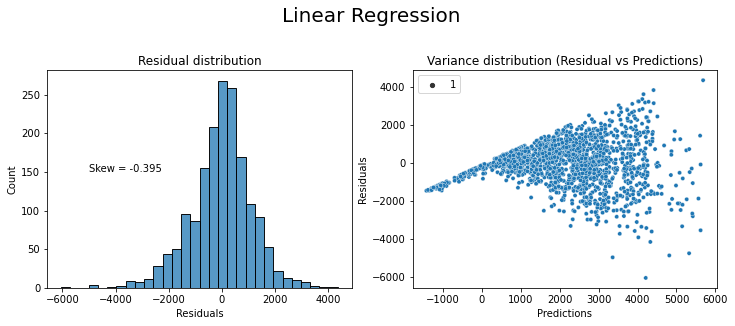

In [151]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
#plt.tight_layout()
fig.suptitle('Linear Regression', y=1.1, fontsize=20)

# Residual Normality
residuals = LR.predict(X_valid) - y_valid
sns.histplot(residuals, bins=30, ax = axes[0])
axes[0].set_title('Residual distribution')
axes[0].set_xlabel('Residuals')
axes[0].text(x=-5000, y=150, s='Skew = ' + str(round(skew(residuals),3)))

# Residual variance
sns.scatterplot(x=LR.predict(X_valid), y=residuals, ax = axes[1], size=1)
axes[1].set_title('Variance distribution (Residual vs Predictions)')
axes[1].set_xlabel('Predictions')
axes[1].set_ylabel('Residuals')

In [152]:
coef_df = pd.concat([pd.Series(X_train.columns), pd.Series(LR.coef_)], axis=1)
coef_df.columns = ['feature', 'LR_coef']
coef_df = coef_df.sort_values('LR_coef', ascending=False)

<AxesSubplot:xlabel='LR_coef', ylabel='feature'>

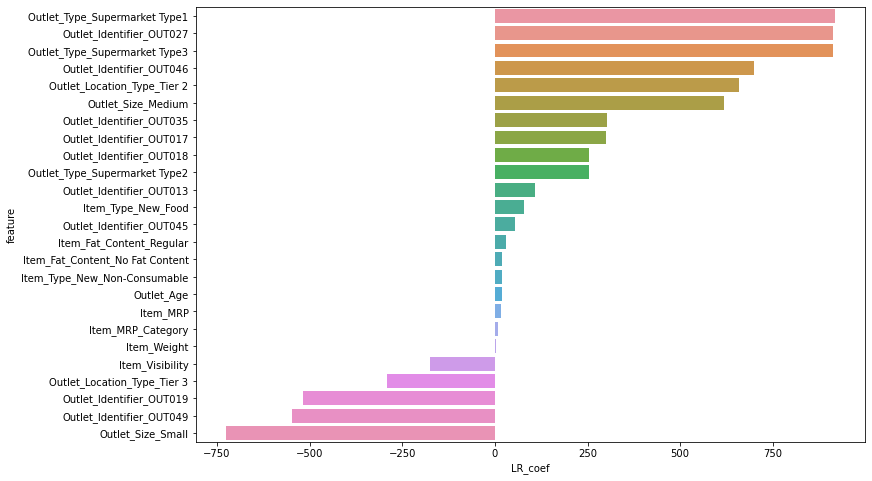

In [153]:
plt.figure(figsize=(12,8))
sns.barplot(data=coef_df, y='feature', x='LR_coef')

In [154]:
ridge_pipe = Pipeline([('scaler', StandardScaler()), ('ridge', RidgeCV(alphas = np.logspace(0.1,3,500), cv=10))]).fit(X_train, y_train)
print(f'Ridge CV best alpha: {ridge_pipe["ridge"].alpha_}')
print(f'Ridge CV best r2: {ridge_pipe["ridge"].best_score_}')
print(f'Ridge CV train r2: {ridge_pipe.score(X_train, y_train)}')
print(f'Ridge CV valid r2: {ridge_pipe.score(X_valid, y_valid)}')
print(f'Ridge CV train rmse: {mse(y_pred=ridge_pipe.predict(X_train), y_true=y_train, squared=False)}')
print(f'Ridge CV valid rmse: {mse(y_pred=ridge_pipe.predict(X_valid), y_true=y_valid, squared=False)}')

Ridge CV best alpha: 6.887730601571114
Ridge CV best r2: 0.561799226516239
Ridge CV train r2: 0.5637938466735805
Ridge CV valid r2: 0.5607661415168368
Ridge CV train rmse: 1124.3591737984693
Ridge CV valid rmse: 1141.0648460076154


Text(0, 0.5, 'Residuals')

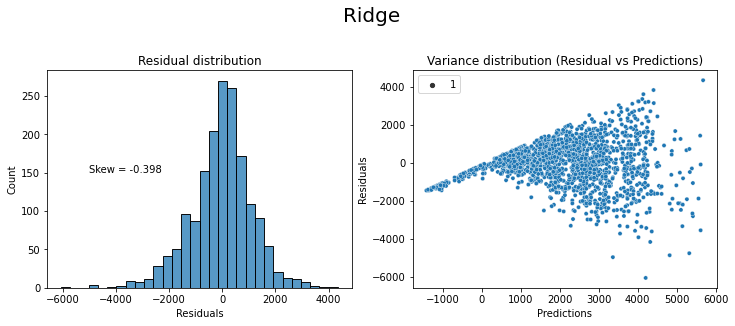

In [155]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
#plt.tight_layout()
fig.suptitle('Ridge', y=1.1, fontsize=20)

# Residual Normality

residuals = ridge_pipe.predict(X_valid) - y_valid
sns.histplot(residuals, bins=30, ax = axes[0])
axes[0].set_title('Residual distribution')
axes[0].set_xlabel('Residuals')
axes[0].text(x=-5000, y=150, s='Skew = ' + str(round(skew(residuals),3)))

# Residual variance

sns.scatterplot(x=ridge_pipe.predict(X_valid), y=residuals, ax = axes[1], size=1)
axes[1].set_title('Variance distribution (Residual vs Predictions)')
axes[1].set_xlabel('Predictions')
axes[1].set_ylabel('Residuals')

In [156]:
coef_df = pd.concat([pd.Series(X_train.columns), pd.Series(ridge_pipe['ridge'].coef_)], axis=1)
coef_df.columns = ['feature', 'ridge_coef']
coef_df = coef_df.sort_values('ridge_coef', ascending=False)

<AxesSubplot:xlabel='ridge_coef', ylabel='feature'>

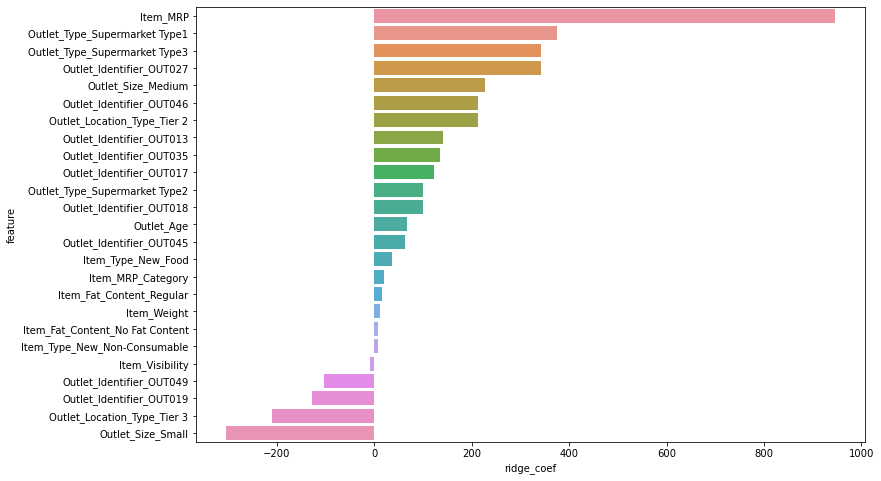

In [157]:
plt.figure(figsize=(12,8))
sns.barplot(data=coef_df, y='feature', x='ridge_coef')

In [158]:
print(f'Start time: {dt.now().time()}')

lasso_pipe = Pipeline([('scaler', StandardScaler()), ('lasso', LassoCV(alphas=np.linspace(0.01,10,100), cv=5, max_iter=10000))]).fit(X_train, y_train)
print(f'Lasso CV best alpha: {lasso_pipe["lasso"].alpha_}')
print(f'Lasso CV train r2: {lasso_pipe.score(X_train, y_train)}')
print(f'Lasso CV valid r2: {lasso_pipe.score(X_valid, y_valid)}')
print(f'Lasso CV train rmse: {mse(y_pred=lasso_pipe.predict(X_train), y_true=y_train, squared=False)}')
print(f'Lasso CV valid rmse: {mse(y_pred=lasso_pipe.predict(X_valid), y_true=y_valid, squared=False)}')

print(f'End time: {dt.now().time()}')

Start time: 20:48:14.520419
Lasso CV best alpha: 1.8263636363636364
Lasso CV train r2: 0.5637647918435209
Lasso CV valid r2: 0.5611252616324058
Lasso CV train rmse: 1124.3966188465283
Lasso CV valid rmse: 1140.5982800482798
End time: 20:48:14.773477


Text(0, 0.5, 'Residuals')

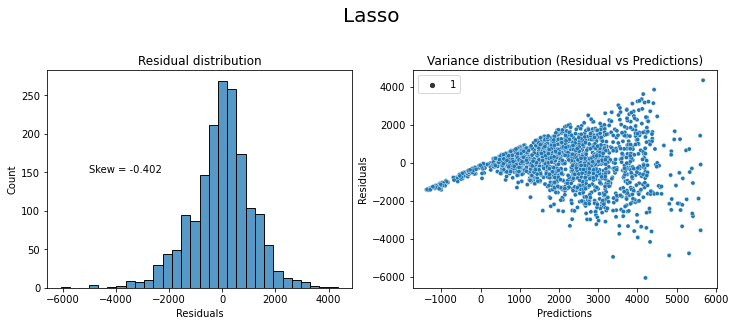

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
#plt.tight_layout()
fig.suptitle('Lasso', y=1.1, fontsize=20)

# Residual Normality

residuals = lasso_pipe.predict(X_valid) - y_valid
sns.histplot(residuals, bins=30, ax = axes[0])
axes[0].set_title('Residual distribution')
axes[0].set_xlabel('Residuals')
axes[0].text(x=-5000, y=150, s='Skew = ' + str(round(skew(residuals),3)))

# Residual variance

sns.scatterplot(x=lasso_pipe.predict(X_valid), y=residuals, ax = axes[1], size=1)
axes[1].set_title('Variance distribution (Residual vs Predictions)')
axes[1].set_xlabel('Predictions')
axes[1].set_ylabel('Residuals')

In [160]:
coef_df = pd.concat([pd.Series(X_train.columns), pd.Series(lasso_pipe['lasso'].coef_)], axis=1)
coef_df.columns = ['feature', 'lasso_coef']
coef_df = coef_df.sort_values('lasso_coef', ascending=False)

<AxesSubplot:xlabel='lasso_coef', ylabel='feature'>

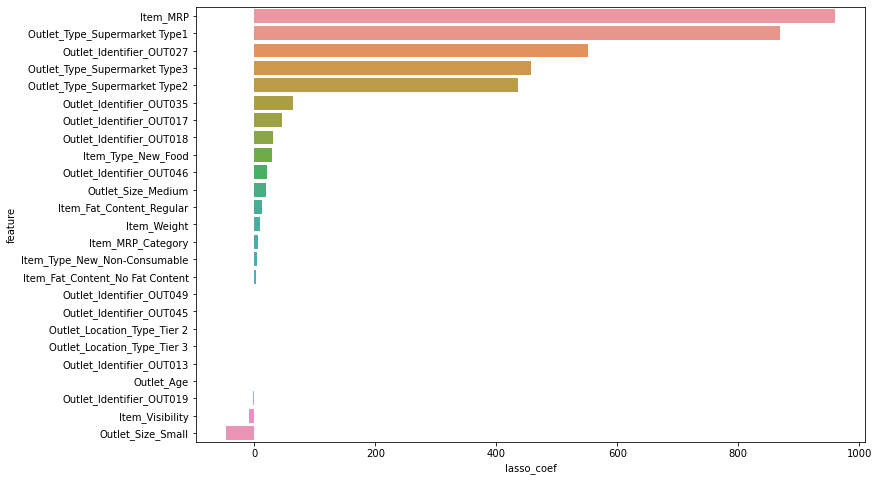

In [161]:
plt.figure(figsize=(12,8))
sns.barplot(data=coef_df.sort_values('lasso_coef', ascending=False), y='feature', x='lasso_coef')

In [162]:
from sklearn.compose import TransformedTargetRegressor

In [163]:
TransformedTargetRegressor(regressor=RidgeCV(alphas = np.logspace(0.1,3,500), cv=10), func=np.log1p, inverse_func=np.expm1)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=RidgeCV(alphas=array([   1.25892541,    1.27588527,    1.2930736 ,    1.3104935 ,
          1.32814806,    1.34604047,    1.36417391,    1.38255164,
          1.40117696,    1.42005318,    1.4391837 ,    1.45857194,
          1.47822138,    1.49813552,    1.51831795,    1.53877226,
          1.55950213,    1.58051126,    1.60180343,    1.62338243,
          1.64525214,    1.66741647,    1.68...
        696.76475187,  706.15135304,  715.66440762,  725.30561916,
        735.07671414,  744.97944233,  755.01557703,  765.18691546,
        775.49527904,  785.94251374,  796.53049038,  807.261105  ,
        818.13627917,  829.15796035,  840.32812225,  851.64876514,
        863.12191626,  874.74963016,  886.53398905,  898.47710321,
        910.58111135,  922.84818098,  935.28050881,  947.88032115,
        960.64987429,  973.59145495,  986.70738061, 1000.        ]),
                                             cv=10))

In [164]:
ttr = TransformedTargetRegressor(regressor=LinearRegression(), func=np.log1p, inverse_func=np.expm1)

In [165]:
ttr.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=LinearRegression())

In [166]:
print(f'LR on log transformed sales CV train r2: {ttr.score(X_train, y_train)}')
print(f'LR on log transformed sales CV valid r2: {ttr.score(X_valid, y_valid)}')
print(f'LR on log transformed sales CV train rmse: {mse(y_pred=ttr.predict(X_train), y_true=y_train, squared=False)}')
print(f'LR on log transformed sales CV valid rmse: {mse(y_pred=ttr.predict(X_valid), y_true=y_valid, squared=False)}')

LR on log transformed sales CV train r2: 0.5583158086746121
LR on log transformed sales CV valid r2: 0.5556734477231986
LR on log transformed sales CV train rmse: 1131.397205100949
LR on log transformed sales CV valid rmse: 1147.660815926541


scores worsened with log transformation

In [167]:
X_poly = X.loc[:,['Item_Weight','Item_Visibility','Item_MRP', 'Outlet_Age']]

In [168]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2).fit(X_poly)
X_poly1 = poly.transform(X_poly)

In [169]:
X_poly1.shape

(8523, 15)

In [170]:
poly_columns = poly.get_feature_names_out()

In [171]:
poly_columns

array(['1', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age',
       'Item_Weight^2', 'Item_Weight Item_Visibility',
       'Item_Weight Item_MRP', 'Item_Weight Outlet_Age',
       'Item_Visibility^2', 'Item_Visibility Item_MRP',
       'Item_Visibility Outlet_Age', 'Item_MRP^2', 'Item_MRP Outlet_Age',
       'Outlet_Age^2'], dtype=object)

In [172]:
X_poly_dummy = []

In [173]:
X_dummy

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_MRP_Category,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,...,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_New_Food,Item_Type_New_Non-Consumable
0,9.300,0.016047,249.8092,14,4,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5.920,0.019278,48.2692,4,1,0,0,1,0,0,...,1,1,0,0,1,0,1,0,0,0
2,17.500,0.016760,141.6180,14,3,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,19.200,0.017834,182.0950,15,3,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,8.930,0.009780,53.8614,26,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,26,4,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
8519,8.380,0.046982,108.1570,11,2,0,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0
8520,10.600,0.035186,85.1224,9,2,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
8521,7.210,0.145221,103.1332,4,2,0,0,1,0,0,...,1,1,0,0,1,0,1,0,1,0


In [174]:
for i,x in enumerate(X_dummy.values):
    x = np.concatenate((X_poly1[i], x))
    X_poly_dummy.append(x)

In [175]:
X_poly_dummy = np.array(X_poly_dummy)

In [176]:
X_train, X_valid, y_train, y_valid = train_test_split(X_poly_dummy, y, test_size=0.2, random_state=1)

In [177]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_valid)

print(f'LR train r2: {LR.score(X_train, y_train)}')
print(f'LR valid r2: {LR.score(X_valid, y_valid)}')
print(f'LR train rmse: {mse(y_pred=LR.predict(X_train), y_true=y_train, squared=False)}')
print(f'LR valid rmse: {mse(y_pred=LR.predict(X_valid), y_true=y_valid, squared=False)}')

LR train r2: 0.5684760089663953
LR valid r2: 0.566817942306379
LR train rmse: 1118.3085538154803
LR valid rmse: 1133.176737634701


In [178]:
ridge_pipe = Pipeline([('scaler', StandardScaler()), ('ridge', RidgeCV(alphas = np.logspace(0.1,3,500), cv=10))]).fit(X_train, y_train)
print(f'Ridge CV best alpha: {ridge_pipe["ridge"].alpha_}')
print(f'Ridge CV best r2: {ridge_pipe["ridge"].best_score_}')
print(f'Ridge CV train r2: {ridge_pipe.score(X_train, y_train)}')
print(f'Ridge CV valid r2: {ridge_pipe.score(X_valid, y_valid)}')
print(f'Ridge CV train rmse: {mse(y_pred=ridge_pipe.predict(X_train), y_true=y_train, squared=False)}')
print(f'Ridge CV valid rmse: {mse(y_pred=ridge_pipe.predict(X_valid), y_true=y_valid, squared=False)}')

Ridge CV best alpha: 15.3735281387755
Ridge CV best r2: 0.5651966456515025
Ridge CV train r2: 0.5684444769636406
Ridge CV valid r2: 0.5665459240557617
Ridge CV train rmse: 1118.3494111779755
Ridge CV valid rmse: 1133.5324730266357


Text(0, 0.5, 'Residuals')

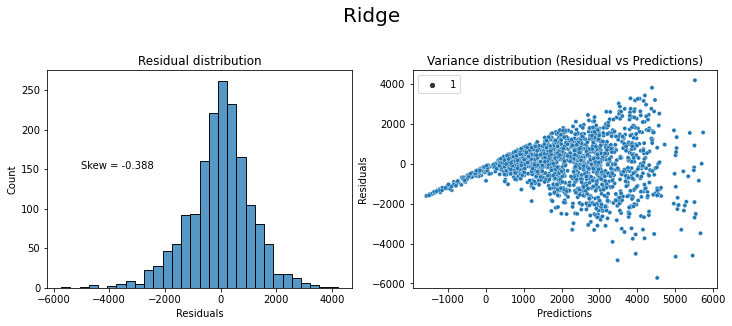

In [179]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
#plt.tight_layout()
fig.suptitle('Ridge', y=1.1, fontsize=20)

# Residual Normality

residuals = ridge_pipe.predict(X_valid) - y_valid
sns.histplot(residuals, bins=30, ax = axes[0])
axes[0].set_title('Residual distribution')
axes[0].set_xlabel('Residuals')
axes[0].text(x=-5000, y=150, s='Skew = ' + str(round(skew(residuals),3)))

# Residual variance

sns.scatterplot(x=ridge_pipe.predict(X_valid), y=residuals, ax = axes[1], size=1)
axes[1].set_title('Variance distribution (Residual vs Predictions)')
axes[1].set_xlabel('Predictions')
axes[1].set_ylabel('Residuals')

In [180]:
X_poly_dummy.shape

(8523, 40)

In [181]:
poly_columns

array(['1', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age',
       'Item_Weight^2', 'Item_Weight Item_Visibility',
       'Item_Weight Item_MRP', 'Item_Weight Outlet_Age',
       'Item_Visibility^2', 'Item_Visibility Item_MRP',
       'Item_Visibility Outlet_Age', 'Item_MRP^2', 'Item_MRP Outlet_Age',
       'Outlet_Age^2'], dtype=object)

In [182]:
X_dummy.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age',
       'Item_MRP_Category', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Item_Fat_Content_No Fat Content', 'Item_Fat_Content_Regular',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_New_Food',
       'Item_Type_New_Non-Consumable'],
      dtype='object')

In [183]:
coef_columns = np.concatenate((poly_columns, X_dummy.columns))

In [184]:
coef_df = pd.concat([pd.Series(coef_columns), pd.Series(ridge_pipe['ridge'].coef_)], axis=1)
coef_df.columns = ['feature', 'ridge_coef']
coef_df = coef_df.sort_values('ridge_coef', ascending=False)

<AxesSubplot:xlabel='ridge_coef', ylabel='feature'>

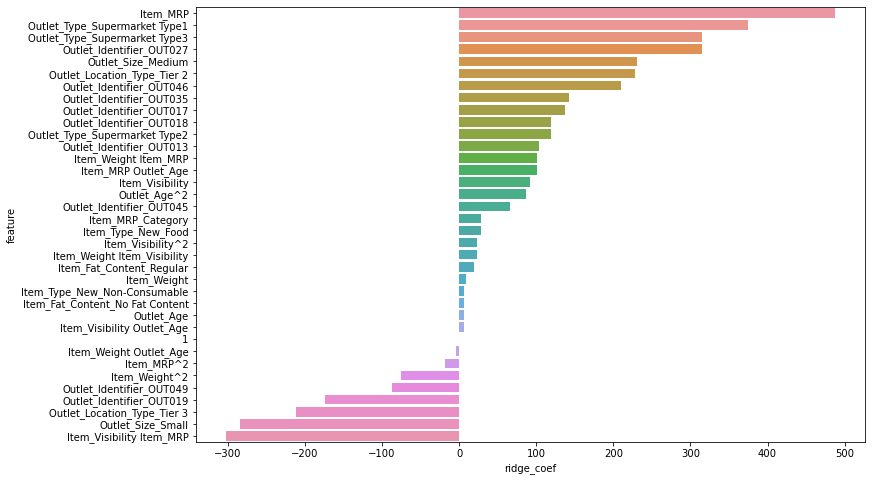

In [185]:
plt.figure(figsize=(12,8))
sns.barplot(data=coef_df, y='feature', x='ridge_coef')

In [186]:
lasso_pipe = Pipeline([('scaler', StandardScaler()), ('lasso', LassoCV(alphas=np.linspace(0.01,10,100), cv=5, max_iter=10000))]).fit(X_train, y_train)
print(f'Lasso CV best alpha: {lasso_pipe["lasso"].alpha_}')
print(f'Lasso CV train r2: {lasso_pipe.score(X_train, y_train)}')
print(f'Lasso CV valid r2: {lasso_pipe.score(X_valid, y_valid)}')
print(f'Lasso CV train rmse: {mse(y_pred=lasso_pipe.predict(X_train), y_true=y_train, squared=False)}')
print(f'Lasso CV valid rmse: {mse(y_pred=lasso_pipe.predict(X_valid), y_true=y_valid, squared=False)}')

Lasso CV best alpha: 2.028181818181818
Lasso CV train r2: 0.5682849051009791
Lasso CV valid r2: 0.5666484756314548
Lasso CV train rmse: 1118.5561523684007
Lasso CV valid rmse: 1133.3983729868023


Text(0, 0.5, 'Residuals')

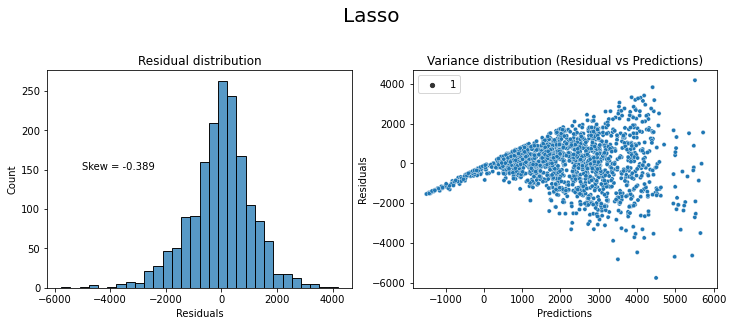

In [187]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
#plt.tight_layout()
fig.suptitle('Lasso', y=1.1, fontsize=20)

# Residual Normality

residuals = lasso_pipe.predict(X_valid) - y_valid
sns.histplot(residuals, bins=30, ax = axes[0])
axes[0].set_title('Residual distribution')
axes[0].set_xlabel('Residuals')
axes[0].text(x=-5000, y=150, s='Skew = ' + str(round(skew(residuals),3)))

# Residual variance

sns.scatterplot(x=lasso_pipe.predict(X_valid), y=residuals, ax = axes[1], size=1)
axes[1].set_title('Variance distribution (Residual vs Predictions)')
axes[1].set_xlabel('Predictions')
axes[1].set_ylabel('Residuals')

In [188]:
coef_df = pd.concat([pd.Series(coef_columns), pd.Series(lasso_pipe['lasso'].coef_)], axis=1)
coef_df.columns = ['feature', 'lasso_coef']
coef_df = coef_df.sort_values('lasso_coef', ascending=False)

<AxesSubplot:xlabel='lasso_coef', ylabel='feature'>

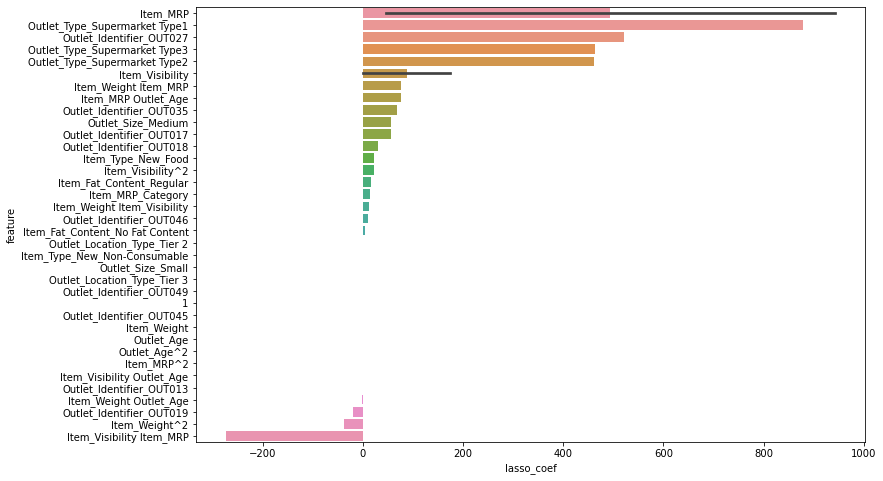

In [189]:
plt.figure(figsize=(12,8))
sns.barplot(data=coef_df, y='feature', x='lasso_coef')

In [190]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [191]:
rf = RandomForestRegressor()

In [192]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [193]:
print(f'RF train r2: {rf.score(X_train, y_train)}')
print(f'RF valid r2: {rf.score(X_valid, y_valid)}')
print(f'RF train rmse: {mse(y_pred=rf.predict(X_train), y_true=y_train, squared=False)}')
print(f'RF valid rmse: {mse(y_pred=rf.predict(X_valid), y_true=y_valid, squared=False)}')

RF train r2: 0.9399393381963225
RF valid r2: 0.5416484840054328
RF train rmse: 417.20954002434536
RF valid rmse: 1165.6327919190267


basic RF model is overfitting

In [194]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [195]:
n_estimators = [100, 200, 300] # number of trees in the random forest
max_features = [1.0, 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(5, 50, 10)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 5, 8, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4, 6] # minimum sample number that can be stored in a leaf node
#bootstrap = [True, False] # method used to sample data points

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,    
    'max_depth': max_depth,    
    'min_samples_split': min_samples_split,    
    'min_samples_leaf': min_samples_leaf
    #'bootstrap': bootstrap
}

In [196]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, n_iter=100, cv=5, verbose=3, random_state=35, n_jobs=-1)

In [197]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4, 6],
                                        'min_samples_split': [2, 5, 8, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=35, verbose=3)

In [198]:
print(f'Best Parameters: {rf_random.best_params_}')

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 1.0, 'max_depth': 5}


In [199]:
#baseline hypertuned Random Forest
rf_rand = rf_random.best_estimator_

In [200]:
cross_val_score(rf_rand, X_train, y_train, cv=10, scoring='r2')

array([0.61989993, 0.55225354, 0.59550535, 0.58344469, 0.60178807,
       0.61210616, 0.61750382, 0.631775  , 0.58436791, 0.58326013])

In [271]:
r2_std = np.std(np.array([0.61989993, 0.55225354, 0.59550535, 0.58344469, 0.60178807,
                          0.61210616, 0.61750382, 0.631775  , 0.58436791, 0.58326013]))

In [272]:
r2_mean = np.mean(np.array([0.61989993, 0.55225354, 0.59550535, 0.58344469, 0.60178807,
                            0.61210616, 0.61750382, 0.631775  , 0.58436791, 0.58326013]))

In [273]:
r2_upperlimit = r2_mean+(1.96*(r2_std/np.sqrt(10)))
r2_lowerlimit = r2_mean-(1.96*(r2_std/np.sqrt(10)))

In [204]:
cross_val_score(rf_rand, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')

array([-1015.69703514, -1156.24164016, -1133.76903725, -1114.38782232,
       -1040.59479061, -1015.1014707 , -1007.51368265, -1053.84321692,
       -1092.8291713 , -1156.35109996])

In [274]:
rmse_std = np.std(np.array([-1015.69703514, -1156.24164016, -1133.76903725, -1114.38782232,
                            -1040.59479061, -1015.1014707 , -1007.51368265, -1053.84321692,
                            -1092.8291713 , -1156.35109996]))

In [275]:
rmse_mean = abs(np.mean(np.array([-1015.69703514, -1156.24164016, -1133.76903725, -1114.38782232,
                            -1040.59479061, -1015.1014707 , -1007.51368265, -1053.84321692,
                            -1092.8291713 , -1156.35109996])))

In [276]:
rmse_upperlimit = rmse_mean+(1.96*(rmse_std/np.sqrt(10)))
rmse_lowerlimit = rmse_mean-(1.96*(rmse_std/np.sqrt(10)))

In [277]:
#when we test our model on the validation set, we ideally want to have an r2/rmse score between the following:
print(f'R2 lower limit: {r2_lowerlimit}')
print(f'R2 upper limit: {r2_upperlimit}')
print(f'RMSE lower limit: {rmse_lowerlimit}')
print(f'RMSE upper limit: {rmse_upperlimit}')

R2 lower limit: 0.5844318133851778
R2 upper limit: 0.6119491066148222
RMSE lower limit: 1043.736247237074
RMSE upper limit: 1113.529546164926


In [278]:
#validation scores
print(f'RF_rand train r2: {rf_rand.score(X_train, y_train)}')
print(f'RF_rand valid r2: {rf_rand.score(X_valid, y_valid)}')
print(f'RF_rand train rmse: {mse(y_pred=rf_rand.predict(X_train), y_true=y_train, squared=False)}')
print(f'RF_rand valid rmse: {mse(y_pred=rf_rand.predict(X_valid), y_true=y_valid, squared=False)}')

RF_rand train r2: 0.6213030512475686
RF_rand valid r2: 0.5967482326318321
RF_rand train rmse: 1047.623126138835
RF_rand valid rmse: 1093.3282261727743


Both the validation R2 and RMSE are within the 95% confidence interval of the 10 fold cross validation score.

In [279]:
coef_df = pd.concat([pd.Series(coef_columns), pd.Series(rf_rand.feature_importances_)], axis=1)
coef_df.columns = ['feature', 'RF_rand']
coef_df = coef_df.sort_values('RF_rand', ascending=False)

<AxesSubplot:xlabel='RF_rand', ylabel='feature'>

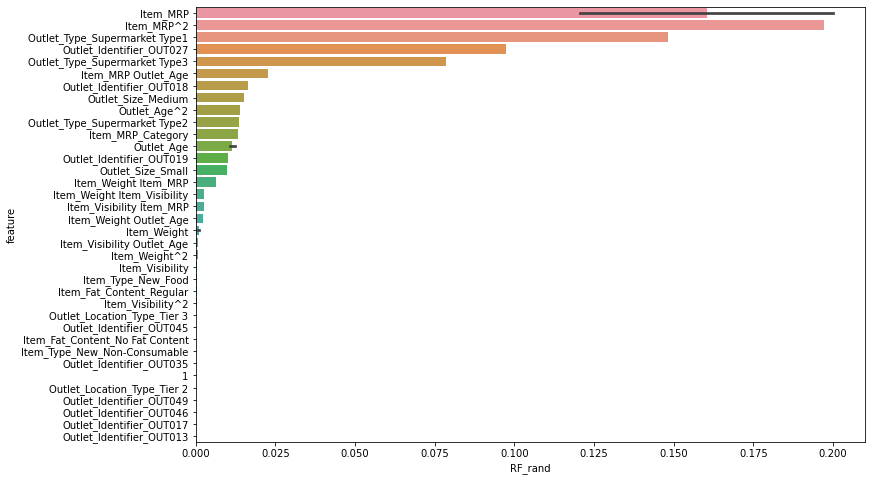

In [280]:
plt.figure(figsize=(12,8))
sns.barplot(data=coef_df, y='feature', x='RF_rand')

In [281]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 1.0,
 'max_depth': 5}

In [213]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'max_features': [1.0,'sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4, 5, 6, 7, 8, 9],
    'n_estimators': [200, 300, 400]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3).fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


In [282]:
rf_grid.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 200}

In [283]:
#baseline hypertuned Random Forest
rf_best = rf_grid.best_estimator_

In [216]:
cross_val_score(rf_best, X_train, y_train, cv=10, scoring='r2')

array([0.62690725, 0.5606235 , 0.59508716, 0.57782632, 0.5909846 ,
       0.61129081, 0.62560816, 0.63304541, 0.59009701, 0.57661403])

In [284]:
rf_best_r2_std = np.std(np.array([0.62690725, 0.5606235 , 0.59508716, 0.57782632, 0.5909846, 
                                  0.61129081, 0.62560816, 0.63304541, 0.59009701, 0.57661403]))

rf_best_r2_mean = np.mean(np.array([0.62690725, 0.5606235 , 0.59508716, 0.57782632, 0.5909846 ,
                                    0.61129081, 0.62560816, 0.63304541, 0.59009701, 0.57661403]))

In [285]:
rf_best_r2_upperlimit = rf_best_r2_mean+(1.96*(rf_best_r2_std/np.sqrt(10)))
rf_best_r2_lowerlimit = rf_best_r2_mean-(1.96*(rf_best_r2_std/np.sqrt(10)))

In [231]:
cross_val_score(rf_rand, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')

array([-1015.41882071, -1155.85037991, -1131.85975743, -1115.77753261,
       -1038.34717833, -1012.03014553, -1006.15856611, -1053.52088474,
       -1093.98067439, -1157.44552345])

In [286]:
rf_best_rmse_std = np.std(np.array([-1015.41882071, -1155.85037991, -1131.85975743, -1115.77753261,
                                    -1038.34717833, -1012.03014553, -1006.15856611, -1053.52088474,
                                    -1093.98067439, -1157.44552345]))
rf_best_rmse_mean = -np.mean(np.array([-1015.41882071, -1155.85037991, -1131.85975743, -1115.77753261,
                                       -1038.34717833, -1012.03014553, -1006.15856611, -1053.52088474,
                                       -1093.98067439, -1157.44552345]))

In [287]:
rf_best_rmse_upperlimit = rf_best_rmse_mean+(1.96*(rf_best_rmse_std/np.sqrt(10)))
rf_best_rmse_lowerlimit = rf_best_rmse_mean-(1.96*(rf_best_rmse_std//np.sqrt(10)))

In [288]:
#when we test our model on the validation set, we ideally want to have an r2/rmse score between the following:
print(f'R2 lower limit: {rf_best_r2_lowerlimit}')
print(f'R2 upper limit: {rf_best_r2_upperlimit}')
print(f'RMSE lower limit: {rf_best_rmse_lowerlimit}')
print(f'RMSE upper limit: {rf_best_rmse_upperlimit}')

R2 lower limit: 0.5844352917739648
R2 upper limit: 0.6131815582260352
RMSE lower limit: 1042.758946321
RMSE upper limit: 1113.404237020696


In [289]:
print(f'RF_rand train r2: {rf_best.score(X_train, y_train)}')
print(f'RF_rand valid r2: {rf_best.score(X_valid, y_valid)}')
print(f'RF_rand train rmse: {mse(y_pred=rf_best.predict(X_train), y_true=y_train, squared=False)}')
print(f'RF_rand valid rmse: {mse(y_pred=rf_best.predict(X_valid), y_true=y_valid, squared=False)}')

RF_rand train r2: 0.6921658539799137
RF_rand valid r2: 0.5929463905318191
RF_rand train rmse: 944.53394352106
RF_rand valid rmse: 1098.470063503628


Both the validation R2 and RMSE are within the 95% confidence interval of the 10 fold cross validation score.

In [290]:
coef_df = pd.concat([pd.Series(coef_columns), pd.Series(rf_best.feature_importances_)], axis=1)
coef_df.columns = ['feature', 'RF_best']
coef_df = coef_df.sort_values('RF_best', ascending=False)

<AxesSubplot:xlabel='RF_best', ylabel='feature'>

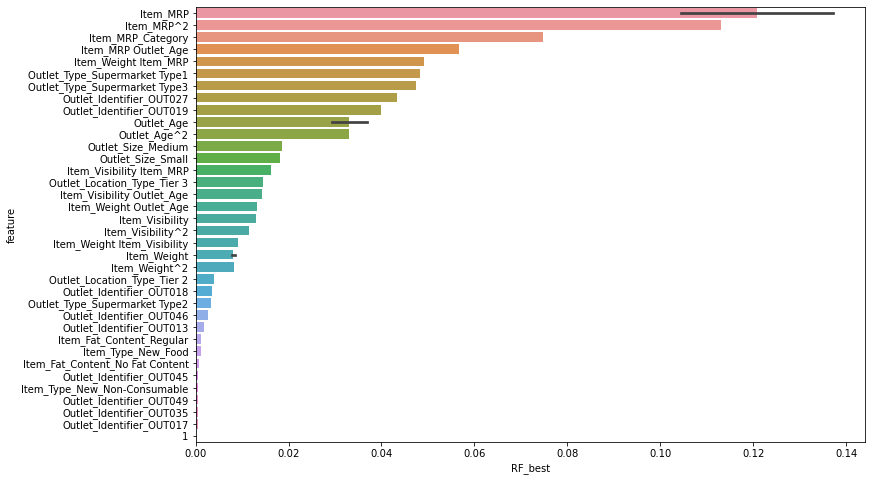

In [291]:
plt.figure(figsize=(12,8))
sns.barplot(data=coef_df, y='feature', x='RF_best')

#### Process test data

In [292]:
X_test = test_clean.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year'], axis=1)
y_test = test_clean['Item_Outlet_Sales']
X_test = pd.get_dummies(X_test, drop_first=True, columns=['Outlet_Identifier','Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_New'])
X_test = X_test.drop('Item_Outlet_Sales', axis=1)

In [293]:
X_test_poly = X_test.loc[:,['Item_Weight','Item_Visibility','Item_MRP', 'Outlet_Age']]
poly2 = PolynomialFeatures(degree=2).fit(X_test_poly)
X_test_poly_transformed = poly2.transform(X_test_poly)

In [294]:
X_test_poly_dummy = []
for i,x in enumerate(X_test.values):
    x = np.concatenate((X_test_poly_transformed[i], x))
    X_test_poly_dummy.append(x)

X_test = np.array(X_test_poly_dummy)

In [295]:
def submission_file(model, X_test, test_clean):
    submission = test_clean.loc[:,['Item_Identifier','Outlet_Identifier']]
    submission['Item_Outlet_Sales'] = model.predict(X_test)
    return submission

models only trained on 80% of training data up to this point.

In [385]:
#LR
LR_2 = submission_file(LR, X_test, test_clean)
LR_2.to_csv('models/LR.csv', index=False)

#Ridge
ridge_2 = submission_file(ridge_pipe, X_test, test_clean)
ridge_2.to_csv('models/ridge.csv', index=False)

#Lasso
lasso_2 = submission_file(lasso_pipe, X_test, test_clean)
lasso_2.to_csv('models/lasso.csv', index=False)

#LR on log transformed y
#LR_log_2 = submission_file(ttr, X_test, test_clean)
#LR_log_2.to_csv('models/LR_log.csv', index=False)

#RF with randomsearchCV
RF_1 = submission_file(rf_rand, X_test, test_clean)
RF_1.to_csv('models/RF_RSCV.csv', index=False)

#RF with gridsearchCV
RF_2 = submission_file(rf_best, X_test, test_clean)
RF_2.to_csv('models/RF_GSCV.csv', index=False)

Refit on 100% training data now.

In [407]:
ridge_pipe.fit(X_poly_dummy, y)
lasso_pipe.fit(X_poly_dummy, y)
rf_rand.fit(X_poly_dummy, y)
rf_best.fit(X_poly_dummy, y)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=5, n_estimators=400)

In [429]:
#LR
LR_full = submission_file(LR, X_test, test_clean)
LR_full.to_csv('models/LR_full.csv', index=False)

#Ridge
ridge_full = submission_file(ridge_pipe, X_test, test_clean)
ridge_full.to_csv('models/ridge_full.csv', index=False)

#Lasso
lasso_full = submission_file(lasso_pipe, X_test, test_clean)
lasso_full.to_csv('models/lasso_full.csv', index=False)

#LR on log transformed y
#LR_log_2 = submission_file(ttr, X_test, test_clean)
#LR_log_2.to_csv('models/LR_log.csv', index=False)

#RF with randomsearchCV
RF_rand_full = submission_file(rf_rand, X_test, test_clean)
RF_rand_full.to_csv('models/RF_RSCV_full.csv', index=False)

#RF with gridsearchCV
RF_grid_full = submission_file(rf_best, X_test, test_clean)
RF_grid_full.to_csv('models/RF_GSCV_full.csv', index=False)

Retune random forest

In [416]:
n_estimators = [200, 300, 400] # number of trees in the random forest
max_features = [1.0, 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(1, 30, 30)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 5, 8, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4, 6] # minimum sample number that can be stored in a leaf node
#bootstrap = [True, False] # method used to sample data points

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,    
    'max_depth': max_depth,    
    'min_samples_split': min_samples_split,    
    'min_samples_leaf': min_samples_leaf
    #'bootstrap': bootstrap
}

rf_random_full = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=5, verbose=3, random_state=35, n_jobs=-1).fit(X_poly_dummy, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [417]:
rf_random_full.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 1.0,
 'max_depth': 6}

In [420]:
rf_rand2 = rf_random_full.best_estimator_

In [421]:
r2CV2 = cross_val_score(rf_rand2, X_poly_dummy, y, cv=10, scoring='r2')
print(f'cross val r2: {r2CV2}')
print(f'cross val mean r2: {np.mean(r2CV2)}')
print(f'cross val r2 std: {np.std(r2CV2)}')

cross val r2: [0.60135253 0.62007308 0.56372417 0.60586398 0.53591224 0.60745966
 0.61919735 0.59233569 0.63676945 0.5778619 ]
cross val mean r2: 0.5960550037245058
cross val r2 std: 0.02834026450675082


In [422]:
rmseCV2 = abs(cross_val_score(rf_rand2, X_poly_dummy, y, cv=10, scoring='neg_root_mean_squared_error'))
print(f'cross val rmse: {rmseCV2}')
print(f'cross val mean rmse: {np.mean(rmseCV2)}')
print(f'cross val rmse std: {np.std(rmseCV2)}')

cross val rmse: [1109.51338148 1085.49480825 1097.46386808 1059.36306456 1089.82634063
 1065.77715652 1058.72900354 1088.87561847 1060.1535442  1105.99406785]
cross val mean rmse: 1082.1190853569788
cross val rmse std: 18.673105474190443


In [418]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 6, 7],
    'max_features': [1.0,'sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3, 4, 5, 6],
    'n_estimators': [100, 200, 300, 400]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3).fit(X_poly_dummy, y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [423]:
rf_grid.best_params_

{'max_depth': 6,
 'max_features': 1.0,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 200}

In [428]:
rf_best2 = rf_grid.best_estimator_

In [431]:
r2CV2 = cross_val_score(rf_best2, X_poly_dummy, y, cv=10, scoring='r2')
print(f'cross val r2: {r2CV2}')
print(f'cross val mean r2: {np.mean(r2CV2)}')
print(f'cross val r2 std: {np.std(r2CV2)}')

cross val r2: [0.60054123 0.61984137 0.5637881  0.60577552 0.53445799 0.60607821
 0.61892147 0.59130938 0.63506009 0.57667784]
cross val mean r2: 0.5952451207343533
cross val r2 std: 0.02837591137372505


In [432]:
rmseCV2 = abs(cross_val_score(rf_best2, X_poly_dummy, y, cv=10, scoring='neg_root_mean_squared_error'))
print(f'cross val rmse: {rmseCV2}')
print(f'cross val mean rmse: {np.mean(rmseCV2)}')
print(f'cross val rmse std: {np.std(rmseCV2)}')

cross val rmse: [1109.21112593 1086.71727409 1097.37701509 1059.72110703 1091.64437043
 1066.26968049 1057.84151446 1087.79562621 1060.42468607 1107.37538116]
cross val mean rmse: 1082.437778095305
cross val rmse std: 18.8697268060986


In [430]:
#RF with randomsearchCV
RF_rand_full_2 = submission_file(rf_rand2, X_test, test_clean)
RF_rand_full_2.to_csv('models/RF_RSCV_full_2.csv', index=False)

#RF with gridsearchCV
RF_grid_full_2 = submission_file(rf_best2, X_test, test_clean)
RF_grid_full_2.to_csv('models/RF_GSCV_full_2.csv', index=False)

### Model leaderboard scores

In [450]:
models = pd.Series(['LR','Ridge', 'Lasso', 'RF_rscv', 'RF_gscv', 'LR_full', 'Ridge_full', 'Lasso_full', 'RF_rscv_full', 'RF_gscv_full', 'RF_rscv_full_retune', 'RF_gscv_full_retune'])

In [452]:
scores = pd.Series([1268.44537023544, 1268.93751225223, 1268.88953619175, 1148.17052560445, 1149.25405748813, 1268.44537023544, 1267.1312356657, 1267.25025151892, 1155.22243193015,1154.57476193061, 1148.21138758692, 1149.34326661921])

In [454]:
leaderboard = pd.DataFrame({'Models': models, 'Scores': scores})

In [459]:
leaderboard = leaderboard.sort_values(by='Scores')

In [462]:
leaderboard['Leaderboard Rank'] = '-'

In [466]:
leaderboard['Leaderboard Rank'][leaderboard['Scores'] == leaderboard['Scores'].min()] = 380

C:\Users\dnkr9\AppData\Local\Temp/ipykernel_16692/1507315522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leaderboard['Leaderboard Rank'][leaderboard['Scores'] == leaderboard['Scores'].min()] = 380


In [467]:
leaderboard

,Models,Scores,Leaderboard Rank
3,RF_rscv,1148.170526,380
10,RF_rscv_full_retune,1148.211388,-
4,RF_gscv,1149.254057,-
11,RF_gscv_full_retune,1149.343267,-
9,RF_gscv_full,1154.574762,-
8,RF_rscv_full,1155.222432,-
6,Ridge_full,1267.131236,-
7,Lasso_full,1267.250252,-
0,LR,1268.445370,-
5,LR_full,1268.445370,-


### Try out XGBoost

In [248]:
XGBRegressor().get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)>

In [245]:
from xgboost import XGBRegressor

(abs(cross_val_score(XGBRegressor(objective='reg:squarederror'), X_train, y_train, scoring='neg_root_mean_squared_error', cv=10)))

array([1062.71782554, 1212.25541647, 1214.12916391, 1210.1801603 ,
       1136.54073678, 1097.85613203, 1118.0470612 , 1145.51965855,
       1176.16026646, 1227.43053672])